In [1]:
# Numpy and Pandas 
import numpy as np
import pandas as pd

# Vizualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Machine learning algorithms
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
# Machine learning pipeline 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Regression Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Ignore ConvergenceWarning messages
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# Check the fitted_model
from sklearn.exceptions import NotFittedError

# Save python object to disk
import pickle

from keras import backend as K



import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from sklearn.metrics import confusion_matrix , classification_report
import tensorflow.python.keras
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.models import model_from_json
from tensorflow.python.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras import backend as K
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [2]:
df = pd.read_csv(r"D:\Ram\MTech\Final_Year_Paper_Work\IEEE_Dataset\Measurement Data\Measurement_Data\Measurement Data\TripA01.csv")

In [3]:
df

,Time [s],Velocity_[km/h],Elevation_[m],Throttle_ [%],Motor_Torque_[Nm],LongitudinalAcceleration_[m/s^2],Regenerative_Braking_Signal,Battery_Voltage_[V],Battery_Current_[A],Battery_Temperature_[?],...,AirCon_Power_[kW],Heater_Signal,Heater_Voltage_[V],Heater_Current_[A],Ambient_Temperature_[?],Coolant_Temperature_Heatercore_[?],Requested_Coolant_Temperature_[?],Coolant_Temperature_Inlet_[?],Heat_Exchanger_Temperature_[?],Cabin_Temperature_Sensor_[?]
0,0.0,0.00,574.0,0.00,0.0,-0.03,0.0,391.40,-2.20,21.0,...,0.40,1,0,0,25.5,0,0,0,30.5,24.50
1,0.1,0.00,574.0,0.00,0.0,0.00,0.0,391.40,-2.21,21.0,...,0.40,1,0,0,25.5,0,0,0,30.5,24.50
2,0.2,0.00,574.0,0.00,0.0,-0.01,0.0,391.40,-2.26,21.0,...,0.40,1,0,0,25.5,0,0,0,30.5,24.50
3,0.3,0.00,574.0,0.00,0.0,-0.03,0.0,391.40,-2.30,21.0,...,0.40,1,0,0,25.5,0,0,0,30.5,24.50
4,0.4,0.00,574.0,0.00,0.0,-0.03,0.0,391.40,-2.30,21.0,...,0.40,1,0,0,25.5,0,0,0,30.5,24.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10085,1008.5,20.71,565.0,25.06,-9.4,-0.28,0.0,387.91,-3.12,22.0,...,1.92,1,0,0,33.0,0,0,0,5.0,22.67
10086,1008.6,20.60,565.0,23.57,-8.9,-0.24,0.0,387.96,-2.37,22.0,...,1.92,1,0,0,33.0,0,0,0,5.0,22.67
10087,1008.7,20.44,565.0,22.55,-12.4,-0.31,0.0,388.01,-1.62,22.0,...,1.92,1,0,0,33.0,0,0,0,5.0,22.67
10088,1008.8,20.30,565.0,22.55,-15.2,-0.40,0.0,388.06,-0.92,22.0,...,1.92,1,0,0,33.0,0,0,0,5.0,22.67


In [4]:
df=df.dropna()

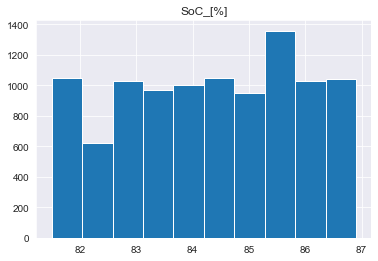

In [5]:
df.hist(column='SoC_[%]')
plt.show()

In [6]:
df.SoC.hist()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'SoC'

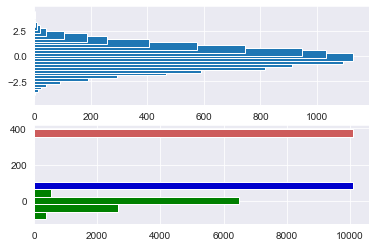

In [7]:
df1=df["Battery_Voltage_[V]"]
df2=df["SoC_[%]"]
df3=df["Battery_Current_[A]"]
df4=df["Battery_Temperature_[?]"]
df5=df["Velocity_[km/h]"]

colors1 = ['indianred', 'mediumblue','green','black','brown']
names = ['Voltage','SoC', 'Current', 'Temperature', 'Speed']

colors = ['indianred', 'mediumblue','green']
plt.hist([df1, df2, df3, df4, df5], bins = int(180/15), stacked=True,
         color = colors1, label=names, orientation='horizontal')
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Voltage (V), Current (A), SoC(%), Battery_Capacity, Driving_Range, Speed, Temperature')
plt.title('Voltage, Current, SoC')
sample=np.random.normal(size=10000)
vert_hist=np.histogram(sample,bins=30)
ax1=plt.subplot(2,1,1)
ax1.barh(vert_hist[1][:-1],vert_hist[0])
ax2=plt.subplot(2,1,2)
ax2.hist([df1, df2, df3], bins = int(180/15), stacked=True,
         color = colors, label=names,orientation='horizontal')
plt.show()

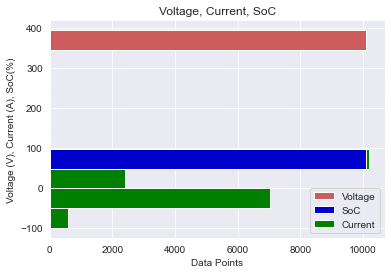

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Voltage, Current, SoC')

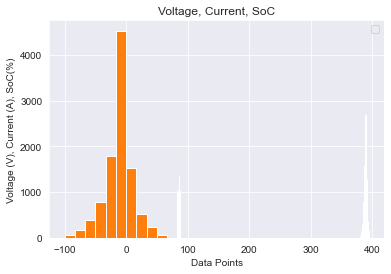

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig=plt.hist([df1, df2,df3], stacked=True,
         color = colors,label=names,orientation='horizontal')
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Voltage (V), Current (A), SoC(%)')
plt.title('Voltage, Current, SoC',loc='center')


# ax.hist([df1, df2,df3], bins, orientation='horizontal')
plt.show()
plt.savefig('Data.jpeg', dpi=600)

plt.hist(df1)
plt.hist(df3)
plt.hist(df2)
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Voltage (V), Current (A), SoC(%)')
plt.title('Voltage, Current, SoC',loc='center')

In [9]:
y = df['SoC_[%]']
X = df.drop(['max_SoC_ [%)','Heating_Power_CAN_[kW]','Heating_Power_LIN_[W]','Requested_Heating_Power_[W]','AirCon_Power_[kW]','Heater_Signal','Heater_Voltage_[V]','Heater_Current_[A]','Ambient_Temperature_[?]','Coolant_Temperature_Heatercore_[?]','Requested_Coolant_Temperature_[?]','Coolant_Temperature_Inlet_[?]','Heat_Exchanger_Temperature_[?]','Cabin_Temperature_Sensor_[?]','displayed_SoC_ [%]','min_SoC_ [%]','max_Battery_Temperature_[?]','Time [s]','Velocity_[km/h]','Elevation_[m]','Throttle_ [%]','Motor_Torque_[Nm]','LongitudinalAcceleration_[m/s^2]','Regenerative_Braking_Signal'], axis='columns')
print(X)

       Battery_Voltage_[V]  Battery_Current_[A]  Battery_Temperature_[?]  \
0                   391.40                -2.20                     21.0   
1                   391.40                -2.21                     21.0   
2                   391.40                -2.26                     21.0   
3                   391.40                -2.30                     21.0   
4                   391.40                -2.30                     21.0   
...                    ...                  ...                      ...   
10085               387.91                -3.12                     22.0   
10086               387.96                -2.37                     22.0   
10087               388.01                -1.62                     22.0   
10088               388.06                -0.92                     22.0   
10089               388.10                -0.30                     22.0   

       SoC_[%]  
0         86.9  
1         86.9  
2         86.9  
3         86.9  
4 

In [10]:
print(y)

0        86.9
1        86.9
2        86.9
3        86.9
4        86.9
         ... 
10085    81.5
10086    81.5
10087    81.5
10088    81.5
10089    81.5
Name: SoC_[%], Length: 10090, dtype: float64


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)

X_train = np.expand_dims(np.array(X_train),1)
y_train = np.expand_dims(np.array(y_train),1)
X_test = np.expand_dims(np.array(X_test),1)
y_test = np.expand_dims(np.array(y_test),1)

#pipelines = {
#    'mlp'   : make_pipeline(StandardScaler(), MLPRegressor(random_state=1234))
#}
print(X_train)

[[[ 3.9009e+02 -5.4000e+00  2.2000e+01  8.5600e+01]]

 [[ 3.8880e+02 -2.0150e+01  2.2000e+01  8.5700e+01]]

 [[ 3.8919e+02 -1.5000e-01  2.2000e+01  8.3300e+01]]

 ...

 [[ 3.9136e+02  3.3040e+01  2.2000e+01  8.3110e+01]]

 [[ 3.8867e+02 -2.5660e+01  2.2000e+01  8.6300e+01]]

 [[ 3.8583e+02 -2.1830e+01  2.2000e+01  8.2100e+01]]]


In [12]:
print(X_train.dtype)
print(y_train.dtype)
print(X_test.dtype)
print(y_test.dtype)

float64
float64
float64
float64


In [13]:
from sklearn.preprocessing import MinMaxScaler
dataset = df2.values #numpy.ndarray
dataset = dataset.astype('float64')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [14]:
X_train.shape

(8072, 1, 4)

In [15]:
y_train.shape

(8072, 1)

In [16]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [18]:
import time
import psutil

start = time.time()

In [22]:
model = Sequential()
#model.add(LSTM(,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(52, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Activation("relu"))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0001),metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs=3000, batch_size=10, validation_data=(X_test, y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=50), ModelCheckpoint(filepath='best_model0.h5', monitor='val_loss', save_best_only=True)], verbose=1, shuffle=False)
#scores = model.evaluate(X_test, Y_test, verbose=1)
#print("Accuracy: %.2f%%" % (scores[1]*100))
# Training Phase
model.summary()

Epoch 1/3000
808/808 [==============================] - 3s 2ms/step - loss: 7017.1656 - mean_absolute_error: 83.7533 - root_mean_squared_error: 83.7684 - val_loss: 6951.3677 - val_mean_absolute_error: 83.3604 - val_root_mean_squared_error: 83.3749
Epoch 2/3000
808/808 [==============================] - 2s 2ms/step - loss: 6925.9904 - mean_absolute_error: 83.2073 - root_mean_squared_error: 83.2225 - val_loss: 6886.6162 - val_mean_absolute_error: 82.9712 - val_root_mean_squared_error: 82.9856
Epoch 3/3000
808/808 [==============================] - 2s 2ms/step - loss: 6861.1798 - mean_absolute_error: 82.8166 - root_mean_squared_error: 82.8322 - val_loss: 6822.7251 - val_mean_absolute_error: 82.5853 - val_root_mean_squared_error: 82.5998
Epoch 4/3000
808/808 [==============================] - 2s 2ms/step - loss: 6798.5404 - mean_absolute_error: 82.4374 - root_mean_squared_error: 82.4532 - val_loss: 6759.6665 - val_mean_absolute_error: 82.2026 - val_root_mean_squared_error: 82.2172
Epoch 5/

Epoch 34/3000
808/808 [==============================] - 2s 2ms/step - loss: 5047.7840 - mean_absolute_error: 70.9905 - root_mean_squared_error: 71.0477 - val_loss: 5005.6514 - val_mean_absolute_error: 70.7336 - val_root_mean_squared_error: 70.7506
Epoch 35/3000
808/808 [==============================] - 2s 2ms/step - loss: 4995.7296 - mean_absolute_error: 70.6190 - root_mean_squared_error: 70.6804 - val_loss: 4951.8047 - val_mean_absolute_error: 70.3520 - val_root_mean_squared_error: 70.3691
Epoch 36/3000
808/808 [==============================] - 2s 2ms/step - loss: 4941.6599 - mean_absolute_error: 70.2348 - root_mean_squared_error: 70.2968 - val_loss: 4898.2432 - val_mean_absolute_error: 69.9702 - val_root_mean_squared_error: 69.9874
Epoch 37/3000
808/808 [==============================] - 2s 2ms/step - loss: 4881.1683 - mean_absolute_error: 69.8020 - root_mean_squared_error: 69.8652 - val_loss: 4844.8184 - val_mean_absolute_error: 69.5874 - val_root_mean_squared_error: 69.6047
Epoc

Epoch 67/3000
808/808 [==============================] - 2s 2ms/step - loss: 3438.6847 - mean_absolute_error: 58.4360 - root_mean_squared_error: 58.6402 - val_loss: 3382.5044 - val_mean_absolute_error: 58.1386 - val_root_mean_squared_error: 58.1593
Epoch 68/3000
808/808 [==============================] - 2s 2ms/step - loss: 3386.5769 - mean_absolute_error: 57.9928 - root_mean_squared_error: 58.1942 - val_loss: 3338.2690 - val_mean_absolute_error: 57.7570 - val_root_mean_squared_error: 57.7778
Epoch 69/3000
808/808 [==============================] - 2s 2ms/step - loss: 3343.9171 - mean_absolute_error: 57.6070 - root_mean_squared_error: 57.8265 - val_loss: 3294.3464 - val_mean_absolute_error: 57.3755 - val_root_mean_squared_error: 57.3964
Epoch 70/3000
808/808 [==============================] - 2s 2ms/step - loss: 3298.2404 - mean_absolute_error: 57.2036 - root_mean_squared_error: 57.4302 - val_loss: 3250.7673 - val_mean_absolute_error: 56.9944 - val_root_mean_squared_error: 57.0155
Epoc

Epoch 100/3000
808/808 [==============================] - 2s 2ms/step - loss: 2147.0175 - mean_absolute_error: 45.8054 - root_mean_squared_error: 46.3357 - val_loss: 2079.3040 - val_mean_absolute_error: 45.5730 - val_root_mean_squared_error: 45.5994
Epoch 101/3000
808/808 [==============================] - 2s 2ms/step - loss: 2122.2359 - mean_absolute_error: 45.5259 - root_mean_squared_error: 46.0670 - val_loss: 2044.8192 - val_mean_absolute_error: 45.1931 - val_root_mean_squared_error: 45.2197
Epoch 102/3000
808/808 [==============================] - 2s 2ms/step - loss: 2088.4558 - mean_absolute_error: 45.1504 - root_mean_squared_error: 45.6994 - val_loss: 2010.6243 - val_mean_absolute_error: 44.8132 - val_root_mean_squared_error: 44.8400
Epoch 103/3000
808/808 [==============================] - 2s 2ms/step - loss: 2043.0851 - mean_absolute_error: 44.6134 - root_mean_squared_error: 45.1990 - val_loss: 1976.7086 - val_mean_absolute_error: 44.4331 - val_root_mean_squared_error: 44.4602


Epoch 133/3000
808/808 [==============================] - 2s 2ms/step - loss: 1179.3606 - mean_absolute_error: 33.1266 - root_mean_squared_error: 34.3411 - val_loss: 1095.9183 - val_mean_absolute_error: 33.0683 - val_root_mean_squared_error: 33.1047
Epoch 134/3000
808/808 [==============================] - 2s 2ms/step - loss: 1163.6099 - mean_absolute_error: 32.8509 - root_mean_squared_error: 34.1096 - val_loss: 1071.0941 - val_mean_absolute_error: 32.6908 - val_root_mean_squared_error: 32.7276
Epoch 135/3000
808/808 [==============================] - 2s 2ms/step - loss: 1143.2005 - mean_absolute_error: 32.5306 - root_mean_squared_error: 33.8110 - val_loss: 1046.5831 - val_mean_absolute_error: 32.3137 - val_root_mean_squared_error: 32.3509
Epoch 136/3000
808/808 [==============================] - 2s 2ms/step - loss: 1117.3357 - mean_absolute_error: 32.1122 - root_mean_squared_error: 33.4261 - val_loss: 1022.3480 - val_mean_absolute_error: 31.9366 - val_root_mean_squared_error: 31.9742


Epoch 166/3000
808/808 [==============================] - 2s 2ms/step - loss: 571.3850 - mean_absolute_error: 21.0527 - root_mean_squared_error: 23.9008 - val_loss: 431.9700 - val_mean_absolute_error: 20.7260 - val_root_mean_squared_error: 20.7839
Epoch 167/3000
808/808 [==============================] - 2s 2ms/step - loss: 551.6079 - mean_absolute_error: 20.4465 - root_mean_squared_error: 23.4845 - val_loss: 416.8557 - val_mean_absolute_error: 20.3581 - val_root_mean_squared_error: 20.4170
Epoch 168/3000
808/808 [==============================] - 2s 2ms/step - loss: 564.2138 - mean_absolute_error: 20.6843 - root_mean_squared_error: 23.7458 - val_loss: 401.9737 - val_mean_absolute_error: 19.9892 - val_root_mean_squared_error: 20.0493
Epoch 169/3000
808/808 [==============================] - 2s 2ms/step - loss: 526.3873 - mean_absolute_error: 19.8686 - root_mean_squared_error: 22.9383 - val_loss: 387.4630 - val_mean_absolute_error: 19.6229 - val_root_mean_squared_error: 19.6841
Epoch 17

808/808 [==============================] - 2s 2ms/step - loss: 252.7141 - mean_absolute_error: 12.7061 - root_mean_squared_error: 15.8908 - val_loss: 86.4651 - val_mean_absolute_error: 9.1685 - val_root_mean_squared_error: 9.2987
Epoch 200/3000
808/808 [==============================] - 2s 2ms/step - loss: 272.9211 - mean_absolute_error: 13.1805 - root_mean_squared_error: 16.5172 - val_loss: 80.6782 - val_mean_absolute_error: 8.8473 - val_root_mean_squared_error: 8.9821
Epoch 201/3000
808/808 [==============================] - 2s 2ms/step - loss: 252.8663 - mean_absolute_error: 12.6646 - root_mean_squared_error: 15.8989 - val_loss: 75.5621 - val_mean_absolute_error: 8.5533 - val_root_mean_squared_error: 8.6926
Epoch 202/3000
808/808 [==============================] - 2s 2ms/step - loss: 276.8095 - mean_absolute_error: 13.2292 - root_mean_squared_error: 16.6343 - val_loss: 70.4563 - val_mean_absolute_error: 8.2495 - val_root_mean_squared_error: 8.3938
Epoch 203/3000
808/808 [===========

808/808 [==============================] - 2s 2ms/step - loss: 204.2708 - mean_absolute_error: 11.3657 - root_mean_squared_error: 14.2910 - val_loss: 13.4731 - val_mean_absolute_error: 3.3275 - val_root_mean_squared_error: 3.6706
Epoch 233/3000
808/808 [==============================] - 2s 2ms/step - loss: 211.9154 - mean_absolute_error: 11.3785 - root_mean_squared_error: 14.5551 - val_loss: 13.1731 - val_mean_absolute_error: 3.2821 - val_root_mean_squared_error: 3.6295
Epoch 234/3000
808/808 [==============================] - 2s 2ms/step - loss: 207.6042 - mean_absolute_error: 11.2738 - root_mean_squared_error: 14.3998 - val_loss: 12.8581 - val_mean_absolute_error: 3.2337 - val_root_mean_squared_error: 3.5858
Epoch 235/3000
808/808 [==============================] - 2s 2ms/step - loss: 204.4831 - mean_absolute_error: 11.2540 - root_mean_squared_error: 14.2977 - val_loss: 12.6166 - val_mean_absolute_error: 3.1962 - val_root_mean_squared_error: 3.5520
Epoch 236/3000
808/808 [===========

808/808 [==============================] - 2s 2ms/step - loss: 205.4308 - mean_absolute_error: 11.2930 - root_mean_squared_error: 14.3309 - val_loss: 9.8146 - val_mean_absolute_error: 2.7254 - val_root_mean_squared_error: 3.1328
Epoch 266/3000
808/808 [==============================] - 2s 2ms/step - loss: 201.0078 - mean_absolute_error: 10.9812 - root_mean_squared_error: 14.1758 - val_loss: 9.8017 - val_mean_absolute_error: 2.7231 - val_root_mean_squared_error: 3.1308
Epoch 267/3000
808/808 [==============================] - 2s 2ms/step - loss: 207.0760 - mean_absolute_error: 11.0902 - root_mean_squared_error: 14.3888 - val_loss: 9.7731 - val_mean_absolute_error: 2.7182 - val_root_mean_squared_error: 3.1262
Epoch 268/3000
808/808 [==============================] - 2s 2ms/step - loss: 203.1948 - mean_absolute_error: 11.1708 - root_mean_squared_error: 14.2495 - val_loss: 9.7142 - val_mean_absolute_error: 2.7079 - val_root_mean_squared_error: 3.1168
Epoch 269/3000
808/808 [===============

Epoch 299/3000
808/808 [==============================] - 2s 2ms/step - loss: 195.9887 - mean_absolute_error: 10.9710 - root_mean_squared_error: 13.9945 - val_loss: 8.9179 - val_mean_absolute_error: 2.5719 - val_root_mean_squared_error: 2.9863
Epoch 300/3000
808/808 [==============================] - 2s 2ms/step - loss: 199.4550 - mean_absolute_error: 10.8655 - root_mean_squared_error: 14.1215 - val_loss: 8.9534 - val_mean_absolute_error: 2.5779 - val_root_mean_squared_error: 2.9922
Epoch 301/3000
808/808 [==============================] - 2s 2ms/step - loss: 194.0419 - mean_absolute_error: 11.0141 - root_mean_squared_error: 13.9267 - val_loss: 9.1309 - val_mean_absolute_error: 2.6080 - val_root_mean_squared_error: 3.0217
Epoch 302/3000
808/808 [==============================] - 2s 2ms/step - loss: 195.0680 - mean_absolute_error: 11.0233 - root_mean_squared_error: 13.9651 - val_loss: 9.0538 - val_mean_absolute_error: 2.5950 - val_root_mean_squared_error: 3.0089
Epoch 303/3000
808/808 [

808/808 [==============================] - 2s 2ms/step - loss: 194.3417 - mean_absolute_error: 10.8076 - root_mean_squared_error: 13.9388 - val_loss: 8.8046 - val_mean_absolute_error: 2.5532 - val_root_mean_squared_error: 2.9673
Epoch 333/3000
808/808 [==============================] - 2s 2ms/step - loss: 196.3221 - mean_absolute_error: 10.8773 - root_mean_squared_error: 14.0101 - val_loss: 8.7355 - val_mean_absolute_error: 2.5417 - val_root_mean_squared_error: 2.9556
Epoch 334/3000
808/808 [==============================] - 2s 2ms/step - loss: 195.1846 - mean_absolute_error: 10.8400 - root_mean_squared_error: 13.9693 - val_loss: 8.7190 - val_mean_absolute_error: 2.5389 - val_root_mean_squared_error: 2.9528
Epoch 335/3000
808/808 [==============================] - 2s 2ms/step - loss: 189.7456 - mean_absolute_error: 10.6964 - root_mean_squared_error: 13.7722 - val_loss: 8.7632 - val_mean_absolute_error: 2.5463 - val_root_mean_squared_error: 2.9603
Epoch 336/3000
808/808 [===============

Epoch 366/3000
808/808 [==============================] - 2s 2ms/step - loss: 184.5013 - mean_absolute_error: 10.5661 - root_mean_squared_error: 13.5826 - val_loss: 8.3727 - val_mean_absolute_error: 2.4803 - val_root_mean_squared_error: 2.8936
Epoch 367/3000
808/808 [==============================] - 2s 2ms/step - loss: 184.3551 - mean_absolute_error: 10.5317 - root_mean_squared_error: 13.5754 - val_loss: 8.3456 - val_mean_absolute_error: 2.4757 - val_root_mean_squared_error: 2.8889
Epoch 368/3000
808/808 [==============================] - 2s 2ms/step - loss: 180.2063 - mean_absolute_error: 10.4832 - root_mean_squared_error: 13.4227 - val_loss: 8.3244 - val_mean_absolute_error: 2.4721 - val_root_mean_squared_error: 2.8852
Epoch 369/3000
808/808 [==============================] - 2s 2ms/step - loss: 179.3356 - mean_absolute_error: 10.3537 - root_mean_squared_error: 13.3895 - val_loss: 8.2867 - val_mean_absolute_error: 2.4656 - val_root_mean_squared_error: 2.8787
Epoch 370/3000
808/808 [

808/808 [==============================] - 2s 2ms/step - loss: 176.2994 - mean_absolute_error: 10.3187 - root_mean_squared_error: 13.2736 - val_loss: 8.2690 - val_mean_absolute_error: 2.4626 - val_root_mean_squared_error: 2.8756
Epoch 400/3000
808/808 [==============================] - 2s 2ms/step - loss: 176.4357 - mean_absolute_error: 10.2881 - root_mean_squared_error: 13.2790 - val_loss: 8.3171 - val_mean_absolute_error: 2.4708 - val_root_mean_squared_error: 2.8839
Epoch 401/3000
808/808 [==============================] - 2s 2ms/step - loss: 171.5122 - mean_absolute_error: 10.2180 - root_mean_squared_error: 13.0938 - val_loss: 8.2796 - val_mean_absolute_error: 2.4644 - val_root_mean_squared_error: 2.8774
Epoch 402/3000
808/808 [==============================] - 2s 2ms/step - loss: 173.7539 - mean_absolute_error: 10.2832 - root_mean_squared_error: 13.1791 - val_loss: 8.3468 - val_mean_absolute_error: 2.4759 - val_root_mean_squared_error: 2.8891
Epoch 403/3000
808/808 [===============

Epoch 433/3000
808/808 [==============================] - 2s 2ms/step - loss: 160.9942 - mean_absolute_error: 9.8549 - root_mean_squared_error: 12.6858 - val_loss: 7.9186 - val_mean_absolute_error: 2.4016 - val_root_mean_squared_error: 2.8140
Epoch 434/3000
808/808 [==============================] - 2s 2ms/step - loss: 166.2724 - mean_absolute_error: 10.0805 - root_mean_squared_error: 12.8928 - val_loss: 8.0022 - val_mean_absolute_error: 2.4163 - val_root_mean_squared_error: 2.8288
Epoch 435/3000
808/808 [==============================] - 2s 2ms/step - loss: 166.6451 - mean_absolute_error: 10.0020 - root_mean_squared_error: 12.9062 - val_loss: 8.0284 - val_mean_absolute_error: 2.4209 - val_root_mean_squared_error: 2.8334
Epoch 436/3000
808/808 [==============================] - 2s 2ms/step - loss: 167.4723 - mean_absolute_error: 10.0956 - root_mean_squared_error: 12.9401 - val_loss: 8.0418 - val_mean_absolute_error: 2.4232 - val_root_mean_squared_error: 2.8358
Epoch 437/3000
808/808 [=

Epoch 467/3000
808/808 [==============================] - 2s 2ms/step - loss: 163.0967 - mean_absolute_error: 9.9175 - root_mean_squared_error: 12.7692 - val_loss: 7.7213 - val_mean_absolute_error: 2.3673 - val_root_mean_squared_error: 2.7787
Epoch 468/3000
808/808 [==============================] - 2s 2ms/step - loss: 161.7339 - mean_absolute_error: 9.9508 - root_mean_squared_error: 12.7157 - val_loss: 7.6828 - val_mean_absolute_error: 2.3606 - val_root_mean_squared_error: 2.7718
Epoch 469/3000
808/808 [==============================] - 1s 2ms/step - loss: 165.0585 - mean_absolute_error: 10.1222 - root_mean_squared_error: 12.8441 - val_loss: 7.6368 - val_mean_absolute_error: 2.3525 - val_root_mean_squared_error: 2.7635
Epoch 470/3000
808/808 [==============================] - 2s 2ms/step - loss: 151.2610 - mean_absolute_error: 9.6867 - root_mean_squared_error: 12.2966 - val_loss: 7.5926 - val_mean_absolute_error: 2.3446 - val_root_mean_squared_error: 2.7555
Epoch 471/3000
808/808 [===

Epoch 501/3000
808/808 [==============================] - 2s 2ms/step - loss: 151.7359 - mean_absolute_error: 9.6024 - root_mean_squared_error: 12.3168 - val_loss: 7.2913 - val_mean_absolute_error: 2.2918 - val_root_mean_squared_error: 2.7002
Epoch 502/3000
808/808 [==============================] - 2s 2ms/step - loss: 146.1105 - mean_absolute_error: 9.5364 - root_mean_squared_error: 12.0853 - val_loss: 7.3272 - val_mean_absolute_error: 2.2981 - val_root_mean_squared_error: 2.7069
Epoch 503/3000
808/808 [==============================] - 2s 2ms/step - loss: 152.9822 - mean_absolute_error: 9.6887 - root_mean_squared_error: 12.3663 - val_loss: 7.3845 - val_mean_absolute_error: 2.3080 - val_root_mean_squared_error: 2.7174
Epoch 504/3000
808/808 [==============================] - 2s 2ms/step - loss: 148.2098 - mean_absolute_error: 9.4298 - root_mean_squared_error: 12.1717 - val_loss: 7.3945 - val_mean_absolute_error: 2.3098 - val_root_mean_squared_error: 2.7193
Epoch 505/3000
808/808 [====

Epoch 535/3000
808/808 [==============================] - 2s 2ms/step - loss: 143.9638 - mean_absolute_error: 9.3159 - root_mean_squared_error: 11.9922 - val_loss: 7.1502 - val_mean_absolute_error: 2.2669 - val_root_mean_squared_error: 2.6740
Epoch 536/3000
808/808 [==============================] - 2s 2ms/step - loss: 142.9006 - mean_absolute_error: 9.3535 - root_mean_squared_error: 11.9525 - val_loss: 7.1154 - val_mean_absolute_error: 2.2607 - val_root_mean_squared_error: 2.6675
Epoch 537/3000
808/808 [==============================] - 2s 2ms/step - loss: 147.8621 - mean_absolute_error: 9.4607 - root_mean_squared_error: 12.1573 - val_loss: 7.0701 - val_mean_absolute_error: 2.2526 - val_root_mean_squared_error: 2.6590
Epoch 538/3000
808/808 [==============================] - 2s 2ms/step - loss: 142.0593 - mean_absolute_error: 9.3189 - root_mean_squared_error: 11.9145 - val_loss: 7.1016 - val_mean_absolute_error: 2.2583 - val_root_mean_squared_error: 2.6649
Epoch 539/3000
808/808 [====

Epoch 569/3000
808/808 [==============================] - 2s 2ms/step - loss: 140.6729 - mean_absolute_error: 9.1782 - root_mean_squared_error: 11.8595 - val_loss: 7.1026 - val_mean_absolute_error: 2.2584 - val_root_mean_squared_error: 2.6651
Epoch 570/3000
808/808 [==============================] - 2s 2ms/step - loss: 134.2103 - mean_absolute_error: 9.0738 - root_mean_squared_error: 11.5844 - val_loss: 7.0821 - val_mean_absolute_error: 2.2548 - val_root_mean_squared_error: 2.6612
Epoch 571/3000
808/808 [==============================] - 2s 2ms/step - loss: 137.5411 - mean_absolute_error: 9.1539 - root_mean_squared_error: 11.7251 - val_loss: 7.0712 - val_mean_absolute_error: 2.2528 - val_root_mean_squared_error: 2.6592
Epoch 572/3000
808/808 [==============================] - 1s 2ms/step - loss: 137.6245 - mean_absolute_error: 9.1531 - root_mean_squared_error: 11.7307 - val_loss: 7.0260 - val_mean_absolute_error: 2.2447 - val_root_mean_squared_error: 2.6507
Epoch 573/3000
808/808 [====

Epoch 603/3000
808/808 [==============================] - 2s 2ms/step - loss: 135.2260 - mean_absolute_error: 9.0927 - root_mean_squared_error: 11.6237 - val_loss: 6.8083 - val_mean_absolute_error: 2.2053 - val_root_mean_squared_error: 2.6093
Epoch 604/3000
808/808 [==============================] - 2s 2ms/step - loss: 131.3296 - mean_absolute_error: 8.9867 - root_mean_squared_error: 11.4587 - val_loss: 6.8251 - val_mean_absolute_error: 2.2084 - val_root_mean_squared_error: 2.6125
Epoch 605/3000
808/808 [==============================] - 2s 2ms/step - loss: 129.2117 - mean_absolute_error: 8.8975 - root_mean_squared_error: 11.3655 - val_loss: 6.8404 - val_mean_absolute_error: 2.2112 - val_root_mean_squared_error: 2.6154
Epoch 606/3000
808/808 [==============================] - 2s 2ms/step - loss: 130.2862 - mean_absolute_error: 8.9186 - root_mean_squared_error: 11.4140 - val_loss: 6.8395 - val_mean_absolute_error: 2.2110 - val_root_mean_squared_error: 2.6152
Epoch 607/3000
808/808 [====

Epoch 637/3000
808/808 [==============================] - 2s 2ms/step - loss: 125.9814 - mean_absolute_error: 8.7575 - root_mean_squared_error: 11.2228 - val_loss: 6.3623 - val_mean_absolute_error: 2.1220 - val_root_mean_squared_error: 2.5224
Epoch 638/3000
808/808 [==============================] - 2s 2ms/step - loss: 125.8823 - mean_absolute_error: 8.7117 - root_mean_squared_error: 11.2175 - val_loss: 6.3430 - val_mean_absolute_error: 2.1183 - val_root_mean_squared_error: 2.5185
Epoch 639/3000
808/808 [==============================] - 2s 2ms/step - loss: 125.8161 - mean_absolute_error: 8.7085 - root_mean_squared_error: 11.2148 - val_loss: 6.3626 - val_mean_absolute_error: 2.1220 - val_root_mean_squared_error: 2.5224
Epoch 640/3000
808/808 [==============================] - 2s 2ms/step - loss: 128.9499 - mean_absolute_error: 8.8330 - root_mean_squared_error: 11.3541 - val_loss: 6.3599 - val_mean_absolute_error: 2.1215 - val_root_mean_squared_error: 2.5219
Epoch 641/3000
808/808 [====

Epoch 671/3000
808/808 [==============================] - 2s 2ms/step - loss: 116.2045 - mean_absolute_error: 8.4154 - root_mean_squared_error: 10.7779 - val_loss: 6.2819 - val_mean_absolute_error: 2.1065 - val_root_mean_squared_error: 2.5064
Epoch 672/3000
808/808 [==============================] - 2s 2ms/step - loss: 114.8861 - mean_absolute_error: 8.3252 - root_mean_squared_error: 10.7158 - val_loss: 6.2853 - val_mean_absolute_error: 2.1072 - val_root_mean_squared_error: 2.5071
Epoch 673/3000
808/808 [==============================] - 2s 2ms/step - loss: 115.1233 - mean_absolute_error: 8.3826 - root_mean_squared_error: 10.7284 - val_loss: 6.3043 - val_mean_absolute_error: 2.1108 - val_root_mean_squared_error: 2.5108
Epoch 674/3000
808/808 [==============================] - 2s 2ms/step - loss: 121.8491 - mean_absolute_error: 8.5512 - root_mean_squared_error: 11.0328 - val_loss: 6.2984 - val_mean_absolute_error: 2.1097 - val_root_mean_squared_error: 2.5097
Epoch 675/3000
808/808 [====

808/808 [==============================] - 2s 3ms/step - loss: 110.5804 - mean_absolute_error: 8.2331 - root_mean_squared_error: 10.5147 - val_loss: 5.9444 - val_mean_absolute_error: 2.0409 - val_root_mean_squared_error: 2.4381
Epoch 705/3000
808/808 [==============================] - 2s 3ms/step - loss: 112.0294 - mean_absolute_error: 8.2676 - root_mean_squared_error: 10.5822 - val_loss: 5.9639 - val_mean_absolute_error: 2.0447 - val_root_mean_squared_error: 2.4421
Epoch 706/3000
808/808 [==============================] - 2s 3ms/step - loss: 110.9275 - mean_absolute_error: 8.1882 - root_mean_squared_error: 10.5282 - val_loss: 5.9958 - val_mean_absolute_error: 2.0510 - val_root_mean_squared_error: 2.4486
Epoch 707/3000
808/808 [==============================] - 2s 3ms/step - loss: 110.7132 - mean_absolute_error: 8.2467 - root_mean_squared_error: 10.5205 - val_loss: 6.0226 - val_mean_absolute_error: 2.0563 - val_root_mean_squared_error: 2.4541
Epoch 708/3000
808/808 [===================

Epoch 738/3000
808/808 [==============================] - 2s 2ms/step - loss: 103.4904 - mean_absolute_error: 7.9732 - root_mean_squared_error: 10.1726 - val_loss: 5.9469 - val_mean_absolute_error: 2.0413 - val_root_mean_squared_error: 2.4386
Epoch 739/3000
808/808 [==============================] - 2s 2ms/step - loss: 104.0848 - mean_absolute_error: 7.8994 - root_mean_squared_error: 10.1913 - val_loss: 5.9748 - val_mean_absolute_error: 2.0469 - val_root_mean_squared_error: 2.4443
Epoch 740/3000
808/808 [==============================] - 2s 2ms/step - loss: 103.9395 - mean_absolute_error: 7.9508 - root_mean_squared_error: 10.1945 - val_loss: 5.9861 - val_mean_absolute_error: 2.0491 - val_root_mean_squared_error: 2.4467
Epoch 741/3000
808/808 [==============================] - 2s 2ms/step - loss: 108.4783 - mean_absolute_error: 8.1675 - root_mean_squared_error: 10.4131 - val_loss: 5.9609 - val_mean_absolute_error: 2.0441 - val_root_mean_squared_error: 2.4415
Epoch 742/3000
808/808 [====

Epoch 772/3000
808/808 [==============================] - 2s 2ms/step - loss: 93.3624 - mean_absolute_error: 7.5574 - root_mean_squared_error: 9.6598 - val_loss: 5.7750 - val_mean_absolute_error: 2.0077 - val_root_mean_squared_error: 2.4031
Epoch 773/3000
808/808 [==============================] - 2s 2ms/step - loss: 96.3188 - mean_absolute_error: 7.7016 - root_mean_squared_error: 9.8132 - val_loss: 5.7338 - val_mean_absolute_error: 1.9999 - val_root_mean_squared_error: 2.3945
Epoch 774/3000
808/808 [==============================] - 2s 2ms/step - loss: 97.5925 - mean_absolute_error: 7.7148 - root_mean_squared_error: 9.8775 - val_loss: 5.7476 - val_mean_absolute_error: 2.0025 - val_root_mean_squared_error: 2.3974
Epoch 775/3000
808/808 [==============================] - 2s 2ms/step - loss: 96.4458 - mean_absolute_error: 7.6646 - root_mean_squared_error: 9.8191 - val_loss: 5.7392 - val_mean_absolute_error: 2.0009 - val_root_mean_squared_error: 2.3957
Epoch 776/3000
808/808 [============

Epoch 806/3000
808/808 [==============================] - 2s 2ms/step - loss: 92.1185 - mean_absolute_error: 7.4402 - root_mean_squared_error: 9.5951 - val_loss: 5.4797 - val_mean_absolute_error: 1.9507 - val_root_mean_squared_error: 2.3409
Epoch 807/3000
808/808 [==============================] - 2s 2ms/step - loss: 92.7861 - mean_absolute_error: 7.5267 - root_mean_squared_error: 9.6313 - val_loss: 5.4924 - val_mean_absolute_error: 1.9532 - val_root_mean_squared_error: 2.3436
Epoch 808/3000
808/808 [==============================] - 2s 2ms/step - loss: 93.7646 - mean_absolute_error: 7.5290 - root_mean_squared_error: 9.6823 - val_loss: 5.4472 - val_mean_absolute_error: 1.9446 - val_root_mean_squared_error: 2.3339
Epoch 809/3000
808/808 [==============================] - 2s 2ms/step - loss: 89.8355 - mean_absolute_error: 7.4338 - root_mean_squared_error: 9.4772 - val_loss: 5.5346 - val_mean_absolute_error: 1.9615 - val_root_mean_squared_error: 2.3526
Epoch 810/3000
808/808 [============

Epoch 840/3000
808/808 [==============================] - 2s 2ms/step - loss: 87.3421 - mean_absolute_error: 7.2952 - root_mean_squared_error: 9.3447 - val_loss: 5.3744 - val_mean_absolute_error: 1.9309 - val_root_mean_squared_error: 2.3183
Epoch 841/3000
808/808 [==============================] - 2s 2ms/step - loss: 86.2479 - mean_absolute_error: 7.2857 - root_mean_squared_error: 9.2858 - val_loss: 5.4068 - val_mean_absolute_error: 1.9370 - val_root_mean_squared_error: 2.3253
Epoch 842/3000
808/808 [==============================] - 2s 3ms/step - loss: 89.2707 - mean_absolute_error: 7.3981 - root_mean_squared_error: 9.4476 - val_loss: 5.3554 - val_mean_absolute_error: 1.9273 - val_root_mean_squared_error: 2.3142
Epoch 843/3000
808/808 [==============================] - 2s 3ms/step - loss: 84.6870 - mean_absolute_error: 7.2117 - root_mean_squared_error: 9.1998 - val_loss: 5.3453 - val_mean_absolute_error: 1.9254 - val_root_mean_squared_error: 2.3120
Epoch 844/3000
808/808 [============

Epoch 874/3000
808/808 [==============================] - 2s 2ms/step - loss: 79.4412 - mean_absolute_error: 7.0329 - root_mean_squared_error: 8.9111 - val_loss: 5.1449 - val_mean_absolute_error: 1.8866 - val_root_mean_squared_error: 2.2682
Epoch 875/3000
808/808 [==============================] - 2s 2ms/step - loss: 82.5844 - mean_absolute_error: 7.1068 - root_mean_squared_error: 9.0866 - val_loss: 5.1353 - val_mean_absolute_error: 1.8847 - val_root_mean_squared_error: 2.2661
Epoch 876/3000
808/808 [==============================] - 2s 2ms/step - loss: 81.1736 - mean_absolute_error: 7.1427 - root_mean_squared_error: 9.0080 - val_loss: 5.1099 - val_mean_absolute_error: 1.8802 - val_root_mean_squared_error: 2.2605
Epoch 877/3000
808/808 [==============================] - 2s 2ms/step - loss: 83.6364 - mean_absolute_error: 7.1435 - root_mean_squared_error: 9.1442 - val_loss: 5.1568 - val_mean_absolute_error: 1.8890 - val_root_mean_squared_error: 2.2709
Epoch 878/3000
808/808 [============

Epoch 908/3000
808/808 [==============================] - 2s 2ms/step - loss: 76.1007 - mean_absolute_error: 6.8402 - root_mean_squared_error: 8.7223 - val_loss: 4.9288 - val_mean_absolute_error: 1.8485 - val_root_mean_squared_error: 2.2201
Epoch 909/3000
808/808 [==============================] - 2s 2ms/step - loss: 77.6674 - mean_absolute_error: 6.9111 - root_mean_squared_error: 8.8122 - val_loss: 4.9015 - val_mean_absolute_error: 1.8436 - val_root_mean_squared_error: 2.2139
Epoch 910/3000
808/808 [==============================] - 2s 2ms/step - loss: 75.8062 - mean_absolute_error: 6.8457 - root_mean_squared_error: 8.7047 - val_loss: 4.9090 - val_mean_absolute_error: 1.8449 - val_root_mean_squared_error: 2.2156
Epoch 911/3000
808/808 [==============================] - 2s 2ms/step - loss: 76.7066 - mean_absolute_error: 6.8833 - root_mean_squared_error: 8.7567 - val_loss: 4.9665 - val_mean_absolute_error: 1.8552 - val_root_mean_squared_error: 2.2286
Epoch 912/3000
808/808 [============

Epoch 942/3000
808/808 [==============================] - 2s 2ms/step - loss: 71.6055 - mean_absolute_error: 6.6143 - root_mean_squared_error: 8.4594 - val_loss: 4.7247 - val_mean_absolute_error: 1.8114 - val_root_mean_squared_error: 2.1736
Epoch 943/3000
808/808 [==============================] - 2s 2ms/step - loss: 71.7916 - mean_absolute_error: 6.7163 - root_mean_squared_error: 8.4723 - val_loss: 4.8167 - val_mean_absolute_error: 1.8282 - val_root_mean_squared_error: 2.1947
Epoch 944/3000
808/808 [==============================] - 2s 2ms/step - loss: 72.6225 - mean_absolute_error: 6.6979 - root_mean_squared_error: 8.5202 - val_loss: 4.7733 - val_mean_absolute_error: 1.8203 - val_root_mean_squared_error: 2.1848
Epoch 945/3000
808/808 [==============================] - 2s 2ms/step - loss: 68.5096 - mean_absolute_error: 6.4857 - root_mean_squared_error: 8.2742 - val_loss: 4.8162 - val_mean_absolute_error: 1.8281 - val_root_mean_squared_error: 2.1946
Epoch 946/3000
808/808 [============

Epoch 976/3000
808/808 [==============================] - 2s 2ms/step - loss: 66.2489 - mean_absolute_error: 6.3910 - root_mean_squared_error: 8.1345 - val_loss: 4.5695 - val_mean_absolute_error: 1.7823 - val_root_mean_squared_error: 2.1376
Epoch 977/3000
808/808 [==============================] - 2s 2ms/step - loss: 63.2523 - mean_absolute_error: 6.2275 - root_mean_squared_error: 7.9499 - val_loss: 4.6102 - val_mean_absolute_error: 1.7900 - val_root_mean_squared_error: 2.1471
Epoch 978/3000
808/808 [==============================] - 2s 2ms/step - loss: 66.8040 - mean_absolute_error: 6.4659 - root_mean_squared_error: 8.1717 - val_loss: 4.5947 - val_mean_absolute_error: 1.7871 - val_root_mean_squared_error: 2.1435
Epoch 979/3000
808/808 [==============================] - 2s 2ms/step - loss: 64.5001 - mean_absolute_error: 6.3068 - root_mean_squared_error: 8.0306 - val_loss: 4.5861 - val_mean_absolute_error: 1.7855 - val_root_mean_squared_error: 2.1415
Epoch 980/3000
808/808 [============

Epoch 1010/3000
808/808 [==============================] - 2s 2ms/step - loss: 64.4649 - mean_absolute_error: 6.2451 - root_mean_squared_error: 8.0280 - val_loss: 4.3453 - val_mean_absolute_error: 1.7408 - val_root_mean_squared_error: 2.0845
Epoch 1011/3000
808/808 [==============================] - 2s 2ms/step - loss: 63.7783 - mean_absolute_error: 6.2944 - root_mean_squared_error: 7.9848 - val_loss: 4.3854 - val_mean_absolute_error: 1.7482 - val_root_mean_squared_error: 2.0941
Epoch 1012/3000
808/808 [==============================] - 1s 2ms/step - loss: 64.0913 - mean_absolute_error: 6.2559 - root_mean_squared_error: 8.0036 - val_loss: 4.3596 - val_mean_absolute_error: 1.7434 - val_root_mean_squared_error: 2.0880
Epoch 1013/3000
808/808 [==============================] - 2s 2ms/step - loss: 62.5394 - mean_absolute_error: 6.2323 - root_mean_squared_error: 7.9077 - val_loss: 4.3586 - val_mean_absolute_error: 1.7433 - val_root_mean_squared_error: 2.0877
Epoch 1014/3000
808/808 [=======

Epoch 1044/3000
808/808 [==============================] - 2s 2ms/step - loss: 58.6002 - mean_absolute_error: 6.0049 - root_mean_squared_error: 7.6532 - val_loss: 4.3381 - val_mean_absolute_error: 1.7394 - val_root_mean_squared_error: 2.0828
Epoch 1045/3000
808/808 [==============================] - 2s 2ms/step - loss: 58.1954 - mean_absolute_error: 6.0233 - root_mean_squared_error: 7.6273 - val_loss: 4.3437 - val_mean_absolute_error: 1.7405 - val_root_mean_squared_error: 2.0841
Epoch 1046/3000
808/808 [==============================] - 1s 2ms/step - loss: 58.2533 - mean_absolute_error: 5.9603 - root_mean_squared_error: 7.6321 - val_loss: 4.3971 - val_mean_absolute_error: 1.7504 - val_root_mean_squared_error: 2.0969
Epoch 1047/3000
808/808 [==============================] - 2s 2ms/step - loss: 56.9771 - mean_absolute_error: 5.8803 - root_mean_squared_error: 7.5467 - val_loss: 4.3755 - val_mean_absolute_error: 1.7464 - val_root_mean_squared_error: 2.0918
Epoch 1048/3000
808/808 [=======

Epoch 1078/3000
808/808 [==============================] - 1s 2ms/step - loss: 52.5222 - mean_absolute_error: 5.7625 - root_mean_squared_error: 7.2456 - val_loss: 4.1652 - val_mean_absolute_error: 1.7069 - val_root_mean_squared_error: 2.0409
Epoch 1079/3000
808/808 [==============================] - 1s 2ms/step - loss: 52.8201 - mean_absolute_error: 5.7260 - root_mean_squared_error: 7.2654 - val_loss: 4.1796 - val_mean_absolute_error: 1.7096 - val_root_mean_squared_error: 2.0444
Epoch 1080/3000
808/808 [==============================] - 2s 2ms/step - loss: 54.5669 - mean_absolute_error: 5.7648 - root_mean_squared_error: 7.3859 - val_loss: 4.1697 - val_mean_absolute_error: 1.7077 - val_root_mean_squared_error: 2.0420
Epoch 1081/3000
808/808 [==============================] - 2s 2ms/step - loss: 53.6668 - mean_absolute_error: 5.7666 - root_mean_squared_error: 7.3247 - val_loss: 4.1866 - val_mean_absolute_error: 1.7109 - val_root_mean_squared_error: 2.0461
Epoch 1082/3000
808/808 [=======

Epoch 1112/3000
808/808 [==============================] - 2s 2ms/step - loss: 49.9116 - mean_absolute_error: 5.5817 - root_mean_squared_error: 7.0635 - val_loss: 4.0425 - val_mean_absolute_error: 1.6833 - val_root_mean_squared_error: 2.0106
Epoch 1113/3000
808/808 [==============================] - 2s 2ms/step - loss: 47.8899 - mean_absolute_error: 5.4658 - root_mean_squared_error: 6.9192 - val_loss: 4.0381 - val_mean_absolute_error: 1.6825 - val_root_mean_squared_error: 2.0095
Epoch 1114/3000
808/808 [==============================] - 2s 2ms/step - loss: 52.3080 - mean_absolute_error: 5.6672 - root_mean_squared_error: 7.2308 - val_loss: 3.9983 - val_mean_absolute_error: 1.6747 - val_root_mean_squared_error: 1.9996
Epoch 1115/3000
808/808 [==============================] - 2s 2ms/step - loss: 49.5274 - mean_absolute_error: 5.5300 - root_mean_squared_error: 7.0360 - val_loss: 4.0075 - val_mean_absolute_error: 1.6765 - val_root_mean_squared_error: 2.0019
Epoch 1116/3000
808/808 [=======

Epoch 1146/3000
808/808 [==============================] - 1s 2ms/step - loss: 45.5868 - mean_absolute_error: 5.3247 - root_mean_squared_error: 6.7500 - val_loss: 3.9355 - val_mean_absolute_error: 1.6622 - val_root_mean_squared_error: 1.9838
Epoch 1147/3000
808/808 [==============================] - 1s 2ms/step - loss: 44.7575 - mean_absolute_error: 5.2661 - root_mean_squared_error: 6.6897 - val_loss: 3.9393 - val_mean_absolute_error: 1.6630 - val_root_mean_squared_error: 1.9848
Epoch 1148/3000
808/808 [==============================] - 2s 2ms/step - loss: 45.8945 - mean_absolute_error: 5.3476 - root_mean_squared_error: 6.7731 - val_loss: 3.9322 - val_mean_absolute_error: 1.6616 - val_root_mean_squared_error: 1.9830
Epoch 1149/3000
808/808 [==============================] - 1s 2ms/step - loss: 46.5856 - mean_absolute_error: 5.3378 - root_mean_squared_error: 6.8249 - val_loss: 3.9314 - val_mean_absolute_error: 1.6614 - val_root_mean_squared_error: 1.9828
Epoch 1150/3000
808/808 [=======

Epoch 1180/3000
808/808 [==============================] - 1s 2ms/step - loss: 42.3902 - mean_absolute_error: 5.1324 - root_mean_squared_error: 6.5098 - val_loss: 3.8327 - val_mean_absolute_error: 1.6415 - val_root_mean_squared_error: 1.9577
Epoch 1181/3000
808/808 [==============================] - 1s 2ms/step - loss: 40.8509 - mean_absolute_error: 5.0603 - root_mean_squared_error: 6.3902 - val_loss: 3.8346 - val_mean_absolute_error: 1.6419 - val_root_mean_squared_error: 1.9582
Epoch 1182/3000
808/808 [==============================] - 1s 2ms/step - loss: 41.9328 - mean_absolute_error: 5.1190 - root_mean_squared_error: 6.4745 - val_loss: 3.8173 - val_mean_absolute_error: 1.6384 - val_root_mean_squared_error: 1.9538
Epoch 1183/3000
808/808 [==============================] - 1s 2ms/step - loss: 41.4376 - mean_absolute_error: 5.1026 - root_mean_squared_error: 6.4364 - val_loss: 3.7787 - val_mean_absolute_error: 1.6304 - val_root_mean_squared_error: 1.9439
Epoch 1184/3000
808/808 [=======

Epoch 1214/3000
808/808 [==============================] - 1s 2ms/step - loss: 37.5033 - mean_absolute_error: 4.8897 - root_mean_squared_error: 6.1225 - val_loss: 3.5907 - val_mean_absolute_error: 1.5935 - val_root_mean_squared_error: 1.8949
Epoch 1215/3000
808/808 [==============================] - 1s 2ms/step - loss: 38.0579 - mean_absolute_error: 4.8846 - root_mean_squared_error: 6.1680 - val_loss: 3.5764 - val_mean_absolute_error: 1.5907 - val_root_mean_squared_error: 1.8911
Epoch 1216/3000
808/808 [==============================] - 1s 2ms/step - loss: 37.1145 - mean_absolute_error: 4.8777 - root_mean_squared_error: 6.0917 - val_loss: 3.6033 - val_mean_absolute_error: 1.5960 - val_root_mean_squared_error: 1.8982
Epoch 1217/3000
808/808 [==============================] - 1s 2ms/step - loss: 39.9244 - mean_absolute_error: 4.9783 - root_mean_squared_error: 6.3158 - val_loss: 3.6053 - val_mean_absolute_error: 1.5963 - val_root_mean_squared_error: 1.8987
Epoch 1218/3000
808/808 [=======

Epoch 1248/3000
808/808 [==============================] - 1s 2ms/step - loss: 33.0817 - mean_absolute_error: 4.5914 - root_mean_squared_error: 5.7511 - val_loss: 3.5261 - val_mean_absolute_error: 1.5806 - val_root_mean_squared_error: 1.8778
Epoch 1249/3000
808/808 [==============================] - 1s 2ms/step - loss: 34.4953 - mean_absolute_error: 4.6777 - root_mean_squared_error: 5.8731 - val_loss: 3.5321 - val_mean_absolute_error: 1.5818 - val_root_mean_squared_error: 1.8794
Epoch 1250/3000
808/808 [==============================] - 1s 2ms/step - loss: 35.8040 - mean_absolute_error: 4.7332 - root_mean_squared_error: 5.9823 - val_loss: 3.5013 - val_mean_absolute_error: 1.5757 - val_root_mean_squared_error: 1.8712
Epoch 1251/3000
808/808 [==============================] - 1s 2ms/step - loss: 34.5638 - mean_absolute_error: 4.6296 - root_mean_squared_error: 5.8782 - val_loss: 3.4656 - val_mean_absolute_error: 1.5691 - val_root_mean_squared_error: 1.8616
Epoch 1252/3000
808/808 [=======

Epoch 1282/3000
808/808 [==============================] - 1s 2ms/step - loss: 31.9005 - mean_absolute_error: 4.4506 - root_mean_squared_error: 5.6474 - val_loss: 3.4477 - val_mean_absolute_error: 1.5657 - val_root_mean_squared_error: 1.8568
Epoch 1283/3000
808/808 [==============================] - 1s 2ms/step - loss: 32.0188 - mean_absolute_error: 4.5024 - root_mean_squared_error: 5.6578 - val_loss: 3.4673 - val_mean_absolute_error: 1.5694 - val_root_mean_squared_error: 1.8621
Epoch 1284/3000
808/808 [==============================] - 1s 2ms/step - loss: 31.4599 - mean_absolute_error: 4.4472 - root_mean_squared_error: 5.6083 - val_loss: 3.4405 - val_mean_absolute_error: 1.5643 - val_root_mean_squared_error: 1.8548
Epoch 1285/3000
808/808 [==============================] - 1s 2ms/step - loss: 30.6262 - mean_absolute_error: 4.3991 - root_mean_squared_error: 5.5332 - val_loss: 3.4235 - val_mean_absolute_error: 1.5611 - val_root_mean_squared_error: 1.8503
Epoch 1286/3000
808/808 [=======

Epoch 1316/3000
808/808 [==============================] - 1s 2ms/step - loss: 28.3678 - mean_absolute_error: 4.2125 - root_mean_squared_error: 5.3255 - val_loss: 3.3718 - val_mean_absolute_error: 1.5511 - val_root_mean_squared_error: 1.8362
Epoch 1317/3000
808/808 [==============================] - 1s 2ms/step - loss: 28.5639 - mean_absolute_error: 4.2247 - root_mean_squared_error: 5.3431 - val_loss: 3.3525 - val_mean_absolute_error: 1.5473 - val_root_mean_squared_error: 1.8310
Epoch 1318/3000
808/808 [==============================] - 1s 2ms/step - loss: 27.5985 - mean_absolute_error: 4.1843 - root_mean_squared_error: 5.2526 - val_loss: 3.3378 - val_mean_absolute_error: 1.5444 - val_root_mean_squared_error: 1.8270
Epoch 1319/3000
808/808 [==============================] - 1s 2ms/step - loss: 28.4499 - mean_absolute_error: 4.2395 - root_mean_squared_error: 5.3329 - val_loss: 3.3299 - val_mean_absolute_error: 1.5428 - val_root_mean_squared_error: 1.8248
Epoch 1320/3000
808/808 [=======

Epoch 1350/3000
808/808 [==============================] - 1s 2ms/step - loss: 25.4864 - mean_absolute_error: 3.9988 - root_mean_squared_error: 5.0477 - val_loss: 3.2820 - val_mean_absolute_error: 1.5336 - val_root_mean_squared_error: 1.8116
Epoch 1351/3000
808/808 [==============================] - 1s 2ms/step - loss: 25.5033 - mean_absolute_error: 4.0332 - root_mean_squared_error: 5.0494 - val_loss: 3.2412 - val_mean_absolute_error: 1.5261 - val_root_mean_squared_error: 1.8003
Epoch 1352/3000
808/808 [==============================] - 1s 2ms/step - loss: 24.9699 - mean_absolute_error: 3.9946 - root_mean_squared_error: 4.9963 - val_loss: 3.2342 - val_mean_absolute_error: 1.5248 - val_root_mean_squared_error: 1.7984
Epoch 1353/3000
808/808 [==============================] - 1s 2ms/step - loss: 25.4775 - mean_absolute_error: 4.0399 - root_mean_squared_error: 5.0473 - val_loss: 3.2104 - val_mean_absolute_error: 1.5202 - val_root_mean_squared_error: 1.7917
Epoch 1354/3000
808/808 [=======

Epoch 1384/3000
808/808 [==============================] - 1s 2ms/step - loss: 23.0046 - mean_absolute_error: 3.8499 - root_mean_squared_error: 4.7958 - val_loss: 3.1613 - val_mean_absolute_error: 1.5107 - val_root_mean_squared_error: 1.7780
Epoch 1385/3000
808/808 [==============================] - 1s 2ms/step - loss: 22.8552 - mean_absolute_error: 3.8108 - root_mean_squared_error: 4.7788 - val_loss: 3.1505 - val_mean_absolute_error: 1.5086 - val_root_mean_squared_error: 1.7750
Epoch 1386/3000
808/808 [==============================] - 1s 2ms/step - loss: 22.5130 - mean_absolute_error: 3.8144 - root_mean_squared_error: 4.7435 - val_loss: 3.1490 - val_mean_absolute_error: 1.5083 - val_root_mean_squared_error: 1.7746
Epoch 1387/3000
808/808 [==============================] - 1s 2ms/step - loss: 23.0505 - mean_absolute_error: 3.8151 - root_mean_squared_error: 4.7999 - val_loss: 3.1583 - val_mean_absolute_error: 1.5101 - val_root_mean_squared_error: 1.7772
Epoch 1388/3000
808/808 [=======

Epoch 1418/3000
808/808 [==============================] - 1s 2ms/step - loss: 19.6654 - mean_absolute_error: 3.5726 - root_mean_squared_error: 4.4343 - val_loss: 3.0619 - val_mean_absolute_error: 1.4910 - val_root_mean_squared_error: 1.7498
Epoch 1419/3000
808/808 [==============================] - 1s 2ms/step - loss: 20.8642 - mean_absolute_error: 3.6603 - root_mean_squared_error: 4.5675 - val_loss: 3.0567 - val_mean_absolute_error: 1.4900 - val_root_mean_squared_error: 1.7484
Epoch 1420/3000
808/808 [==============================] - 1s 2ms/step - loss: 20.0236 - mean_absolute_error: 3.5872 - root_mean_squared_error: 4.4745 - val_loss: 3.0741 - val_mean_absolute_error: 1.4935 - val_root_mean_squared_error: 1.7533
Epoch 1421/3000
808/808 [==============================] - 1s 2ms/step - loss: 20.5833 - mean_absolute_error: 3.6358 - root_mean_squared_error: 4.5363 - val_loss: 3.0602 - val_mean_absolute_error: 1.4907 - val_root_mean_squared_error: 1.7493
Epoch 1422/3000
808/808 [=======

808/808 [==============================] - 1s 2ms/step - loss: 18.4802 - mean_absolute_error: 3.4167 - root_mean_squared_error: 4.2985 - val_loss: 3.0168 - val_mean_absolute_error: 1.4818 - val_root_mean_squared_error: 1.7369
Epoch 1452/3000
808/808 [==============================] - 1s 2ms/step - loss: 18.6355 - mean_absolute_error: 3.4368 - root_mean_squared_error: 4.3153 - val_loss: 2.9930 - val_mean_absolute_error: 1.4768 - val_root_mean_squared_error: 1.7300
Epoch 1453/3000
808/808 [==============================] - 1s 2ms/step - loss: 18.4602 - mean_absolute_error: 3.4488 - root_mean_squared_error: 4.2957 - val_loss: 2.9815 - val_mean_absolute_error: 1.4743 - val_root_mean_squared_error: 1.7267
Epoch 1454/3000
808/808 [==============================] - 1s 2ms/step - loss: 17.9648 - mean_absolute_error: 3.3916 - root_mean_squared_error: 4.2380 - val_loss: 2.9810 - val_mean_absolute_error: 1.4742 - val_root_mean_squared_error: 1.7266
Epoch 1455/3000
808/808 [=======================

Epoch 1485/3000
808/808 [==============================] - 1s 2ms/step - loss: 16.1408 - mean_absolute_error: 3.2327 - root_mean_squared_error: 4.0168 - val_loss: 2.9626 - val_mean_absolute_error: 1.4703 - val_root_mean_squared_error: 1.7212
Epoch 1486/3000
808/808 [==============================] - 1s 2ms/step - loss: 15.8760 - mean_absolute_error: 3.1690 - root_mean_squared_error: 3.9831 - val_loss: 2.9528 - val_mean_absolute_error: 1.4683 - val_root_mean_squared_error: 1.7184
Epoch 1487/3000
808/808 [==============================] - 1s 2ms/step - loss: 16.5954 - mean_absolute_error: 3.2495 - root_mean_squared_error: 4.0715 - val_loss: 2.9234 - val_mean_absolute_error: 1.4623 - val_root_mean_squared_error: 1.7098
Epoch 1488/3000
808/808 [==============================] - 1s 2ms/step - loss: 16.3327 - mean_absolute_error: 3.2289 - root_mean_squared_error: 4.0406 - val_loss: 2.9263 - val_mean_absolute_error: 1.4629 - val_root_mean_squared_error: 1.7106
Epoch 1489/3000
808/808 [=======

Epoch 1519/3000
808/808 [==============================] - 1s 2ms/step - loss: 13.7614 - mean_absolute_error: 2.9794 - root_mean_squared_error: 3.7092 - val_loss: 2.8271 - val_mean_absolute_error: 1.4415 - val_root_mean_squared_error: 1.6814
Epoch 1520/3000
808/808 [==============================] - 1s 2ms/step - loss: 13.8398 - mean_absolute_error: 2.9606 - root_mean_squared_error: 3.7194 - val_loss: 2.8287 - val_mean_absolute_error: 1.4418 - val_root_mean_squared_error: 1.6819
Epoch 1521/3000
808/808 [==============================] - 1s 2ms/step - loss: 14.0781 - mean_absolute_error: 3.0306 - root_mean_squared_error: 3.7516 - val_loss: 2.8331 - val_mean_absolute_error: 1.4428 - val_root_mean_squared_error: 1.6832
Epoch 1522/3000
808/808 [==============================] - 1s 2ms/step - loss: 14.0957 - mean_absolute_error: 3.0182 - root_mean_squared_error: 3.7541 - val_loss: 2.8526 - val_mean_absolute_error: 1.4472 - val_root_mean_squared_error: 1.6890
Epoch 1523/3000
808/808 [=======

Epoch 1553/3000
808/808 [==============================] - 1s 2ms/step - loss: 12.2837 - mean_absolute_error: 2.7961 - root_mean_squared_error: 3.5044 - val_loss: 2.7910 - val_mean_absolute_error: 1.4342 - val_root_mean_squared_error: 1.6706
Epoch 1554/3000
808/808 [==============================] - 1s 2ms/step - loss: 11.6069 - mean_absolute_error: 2.7568 - root_mean_squared_error: 3.4065 - val_loss: 2.7894 - val_mean_absolute_error: 1.4339 - val_root_mean_squared_error: 1.6702
Epoch 1555/3000
808/808 [==============================] - 1s 2ms/step - loss: 12.1359 - mean_absolute_error: 2.7787 - root_mean_squared_error: 3.4821 - val_loss: 2.7844 - val_mean_absolute_error: 1.4329 - val_root_mean_squared_error: 1.6687
Epoch 1556/3000
808/808 [==============================] - 1s 2ms/step - loss: 11.7005 - mean_absolute_error: 2.7499 - root_mean_squared_error: 3.4198 - val_loss: 2.7834 - val_mean_absolute_error: 1.4327 - val_root_mean_squared_error: 1.6684
Epoch 1557/3000
808/808 [=======

Epoch 1587/3000
808/808 [==============================] - 2s 2ms/step - loss: 10.6255 - mean_absolute_error: 2.6013 - root_mean_squared_error: 3.2590 - val_loss: 2.7016 - val_mean_absolute_error: 1.4149 - val_root_mean_squared_error: 1.6437
Epoch 1588/3000
808/808 [==============================] - 2s 2ms/step - loss: 11.0464 - mean_absolute_error: 2.6621 - root_mean_squared_error: 3.3226 - val_loss: 2.7132 - val_mean_absolute_error: 1.4175 - val_root_mean_squared_error: 1.6472
Epoch 1589/3000
808/808 [==============================] - 2s 2ms/step - loss: 10.4906 - mean_absolute_error: 2.5978 - root_mean_squared_error: 3.2385 - val_loss: 2.7303 - val_mean_absolute_error: 1.4213 - val_root_mean_squared_error: 1.6524
Epoch 1590/3000
808/808 [==============================] - 2s 2ms/step - loss: 10.5073 - mean_absolute_error: 2.5864 - root_mean_squared_error: 3.2409 - val_loss: 2.7311 - val_mean_absolute_error: 1.4215 - val_root_mean_squared_error: 1.6526
Epoch 1591/3000
808/808 [=======

Epoch 1621/3000
808/808 [==============================] - 2s 2ms/step - loss: 9.0738 - mean_absolute_error: 2.4225 - root_mean_squared_error: 3.0116 - val_loss: 2.6815 - val_mean_absolute_error: 1.4105 - val_root_mean_squared_error: 1.6375
Epoch 1622/3000
808/808 [==============================] - 2s 2ms/step - loss: 8.9279 - mean_absolute_error: 2.3917 - root_mean_squared_error: 2.9878 - val_loss: 2.6812 - val_mean_absolute_error: 1.4104 - val_root_mean_squared_error: 1.6374
Epoch 1623/3000
808/808 [==============================] - 2s 2ms/step - loss: 8.8678 - mean_absolute_error: 2.3632 - root_mean_squared_error: 2.9772 - val_loss: 2.6644 - val_mean_absolute_error: 1.4066 - val_root_mean_squared_error: 1.6323
Epoch 1624/3000
808/808 [==============================] - 2s 2ms/step - loss: 9.1083 - mean_absolute_error: 2.4046 - root_mean_squared_error: 3.0177 - val_loss: 2.6527 - val_mean_absolute_error: 1.4038 - val_root_mean_squared_error: 1.6287
Epoch 1625/3000
808/808 [===========

Epoch 1655/3000
808/808 [==============================] - 2s 2ms/step - loss: 7.7161 - mean_absolute_error: 2.2229 - root_mean_squared_error: 2.7770 - val_loss: 2.6295 - val_mean_absolute_error: 1.3982 - val_root_mean_squared_error: 1.6216
Epoch 1656/3000
808/808 [==============================] - 2s 2ms/step - loss: 8.1268 - mean_absolute_error: 2.2790 - root_mean_squared_error: 2.8496 - val_loss: 2.6221 - val_mean_absolute_error: 1.3964 - val_root_mean_squared_error: 1.6193
Epoch 1657/3000
808/808 [==============================] - 2s 2ms/step - loss: 8.2302 - mean_absolute_error: 2.2851 - root_mean_squared_error: 2.8671 - val_loss: 2.6116 - val_mean_absolute_error: 1.3937 - val_root_mean_squared_error: 1.6160
Epoch 1658/3000
808/808 [==============================] - 2s 2ms/step - loss: 7.8861 - mean_absolute_error: 2.2571 - root_mean_squared_error: 2.8076 - val_loss: 2.6088 - val_mean_absolute_error: 1.3930 - val_root_mean_squared_error: 1.6152
Epoch 1659/3000
808/808 [===========

Epoch 1689/3000
808/808 [==============================] - 2s 2ms/step - loss: 6.6809 - mean_absolute_error: 2.0516 - root_mean_squared_error: 2.5846 - val_loss: 2.5706 - val_mean_absolute_error: 1.3839 - val_root_mean_squared_error: 1.6033
Epoch 1690/3000
808/808 [==============================] - 2s 2ms/step - loss: 6.8279 - mean_absolute_error: 2.0923 - root_mean_squared_error: 2.6129 - val_loss: 2.5738 - val_mean_absolute_error: 1.3847 - val_root_mean_squared_error: 1.6043
Epoch 1691/3000
808/808 [==============================] - 2s 2ms/step - loss: 6.6518 - mean_absolute_error: 2.0564 - root_mean_squared_error: 2.5787 - val_loss: 2.5791 - val_mean_absolute_error: 1.3860 - val_root_mean_squared_error: 1.6060
Epoch 1692/3000
808/808 [==============================] - 2s 2ms/step - loss: 6.5319 - mean_absolute_error: 2.0500 - root_mean_squared_error: 2.5551 - val_loss: 2.5744 - val_mean_absolute_error: 1.3848 - val_root_mean_squared_error: 1.6045
Epoch 1693/3000
808/808 [===========

Epoch 1723/3000
808/808 [==============================] - 2s 2ms/step - loss: 5.8680 - mean_absolute_error: 1.9368 - root_mean_squared_error: 2.4222 - val_loss: 2.5461 - val_mean_absolute_error: 1.3776 - val_root_mean_squared_error: 1.5956
Epoch 1724/3000
808/808 [==============================] - 2s 2ms/step - loss: 5.6979 - mean_absolute_error: 1.9070 - root_mean_squared_error: 2.3864 - val_loss: 2.5410 - val_mean_absolute_error: 1.3762 - val_root_mean_squared_error: 1.5941
Epoch 1725/3000
808/808 [==============================] - 2s 2ms/step - loss: 5.7549 - mean_absolute_error: 1.9372 - root_mean_squared_error: 2.3988 - val_loss: 2.5389 - val_mean_absolute_error: 1.3756 - val_root_mean_squared_error: 1.5934
Epoch 1726/3000
808/808 [==============================] - 2s 2ms/step - loss: 5.9071 - mean_absolute_error: 1.9395 - root_mean_squared_error: 2.4286 - val_loss: 2.5517 - val_mean_absolute_error: 1.3791 - val_root_mean_squared_error: 1.5974
Epoch 1727/3000
808/808 [===========

Epoch 1757/3000
808/808 [==============================] - 2s 2ms/step - loss: 5.2774 - mean_absolute_error: 1.8554 - root_mean_squared_error: 2.2972 - val_loss: 2.5186 - val_mean_absolute_error: 1.3702 - val_root_mean_squared_error: 1.5870
Epoch 1758/3000
808/808 [==============================] - 2s 2ms/step - loss: 5.1202 - mean_absolute_error: 1.8175 - root_mean_squared_error: 2.2623 - val_loss: 2.5198 - val_mean_absolute_error: 1.3705 - val_root_mean_squared_error: 1.5874
Epoch 1759/3000
808/808 [==============================] - 2s 2ms/step - loss: 5.1660 - mean_absolute_error: 1.8248 - root_mean_squared_error: 2.2727 - val_loss: 2.5156 - val_mean_absolute_error: 1.3695 - val_root_mean_squared_error: 1.5861
Epoch 1760/3000
808/808 [==============================] - 2s 2ms/step - loss: 4.9560 - mean_absolute_error: 1.7998 - root_mean_squared_error: 2.2257 - val_loss: 2.5078 - val_mean_absolute_error: 1.3677 - val_root_mean_squared_error: 1.5836
Epoch 1761/3000
808/808 [===========

Epoch 1791/3000
808/808 [==============================] - 2s 2ms/step - loss: 4.2191 - mean_absolute_error: 1.6570 - root_mean_squared_error: 2.0539 - val_loss: 2.4903 - val_mean_absolute_error: 1.3632 - val_root_mean_squared_error: 1.5781
Epoch 1792/3000
808/808 [==============================] - 2s 2ms/step - loss: 4.3367 - mean_absolute_error: 1.6929 - root_mean_squared_error: 2.0822 - val_loss: 2.4869 - val_mean_absolute_error: 1.3623 - val_root_mean_squared_error: 1.5770
Epoch 1793/3000
808/808 [==============================] - 2s 2ms/step - loss: 4.5007 - mean_absolute_error: 1.7197 - root_mean_squared_error: 2.1208 - val_loss: 2.4821 - val_mean_absolute_error: 1.3610 - val_root_mean_squared_error: 1.5755
Epoch 1794/3000
808/808 [==============================] - 2s 2ms/step - loss: 4.3296 - mean_absolute_error: 1.6921 - root_mean_squared_error: 2.0807 - val_loss: 2.4843 - val_mean_absolute_error: 1.3616 - val_root_mean_squared_error: 1.5762
Epoch 1795/3000
808/808 [===========

Epoch 1825/3000
808/808 [==============================] - 2s 2ms/step - loss: 3.9156 - mean_absolute_error: 1.6142 - root_mean_squared_error: 1.9784 - val_loss: 2.4665 - val_mean_absolute_error: 1.3564 - val_root_mean_squared_error: 1.5705
Epoch 1826/3000
808/808 [==============================] - 2s 2ms/step - loss: 3.8444 - mean_absolute_error: 1.6120 - root_mean_squared_error: 1.9604 - val_loss: 2.4643 - val_mean_absolute_error: 1.3557 - val_root_mean_squared_error: 1.5698
Epoch 1827/3000
808/808 [==============================] - 2s 2ms/step - loss: 3.8130 - mean_absolute_error: 1.5936 - root_mean_squared_error: 1.9525 - val_loss: 2.4695 - val_mean_absolute_error: 1.3573 - val_root_mean_squared_error: 1.5715
Epoch 1828/3000
808/808 [==============================] - 2s 2ms/step - loss: 3.7717 - mean_absolute_error: 1.5924 - root_mean_squared_error: 1.9416 - val_loss: 2.4723 - val_mean_absolute_error: 1.3581 - val_root_mean_squared_error: 1.5723
Epoch 1829/3000
808/808 [===========

Epoch 1859/3000
808/808 [==============================] - 2s 2ms/step - loss: 3.5201 - mean_absolute_error: 1.5541 - root_mean_squared_error: 1.8758 - val_loss: 2.4580 - val_mean_absolute_error: 1.3546 - val_root_mean_squared_error: 1.5678
Epoch 1860/3000
808/808 [==============================] - 2s 2ms/step - loss: 3.5419 - mean_absolute_error: 1.5589 - root_mean_squared_error: 1.8813 - val_loss: 2.4570 - val_mean_absolute_error: 1.3544 - val_root_mean_squared_error: 1.5675
Epoch 1861/3000
808/808 [==============================] - 2s 2ms/step - loss: 3.5166 - mean_absolute_error: 1.5417 - root_mean_squared_error: 1.8751 - val_loss: 2.4569 - val_mean_absolute_error: 1.3544 - val_root_mean_squared_error: 1.5675
Epoch 1862/3000
808/808 [==============================] - 2s 2ms/step - loss: 3.4449 - mean_absolute_error: 1.5276 - root_mean_squared_error: 1.8557 - val_loss: 2.4569 - val_mean_absolute_error: 1.3544 - val_root_mean_squared_error: 1.5675
Epoch 1863/3000
808/808 [===========

Epoch 1893/3000
808/808 [==============================] - 1s 2ms/step - loss: 3.1678 - mean_absolute_error: 1.4893 - root_mean_squared_error: 1.7796 - val_loss: 2.4380 - val_mean_absolute_error: 1.3504 - val_root_mean_squared_error: 1.5614
Epoch 1894/3000
808/808 [==============================] - 1s 2ms/step - loss: 3.1448 - mean_absolute_error: 1.4837 - root_mean_squared_error: 1.7732 - val_loss: 2.4362 - val_mean_absolute_error: 1.3500 - val_root_mean_squared_error: 1.5608
Epoch 1895/3000
808/808 [==============================] - 1s 2ms/step - loss: 3.1276 - mean_absolute_error: 1.4736 - root_mean_squared_error: 1.7683 - val_loss: 2.4347 - val_mean_absolute_error: 1.3497 - val_root_mean_squared_error: 1.5603
Epoch 1896/3000
808/808 [==============================] - 1s 2ms/step - loss: 3.1536 - mean_absolute_error: 1.4889 - root_mean_squared_error: 1.7756 - val_loss: 2.4402 - val_mean_absolute_error: 1.3509 - val_root_mean_squared_error: 1.5621
Epoch 1897/3000
808/808 [===========

Epoch 1927/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.9363 - mean_absolute_error: 1.4412 - root_mean_squared_error: 1.7134 - val_loss: 2.4309 - val_mean_absolute_error: 1.3487 - val_root_mean_squared_error: 1.5591
Epoch 1928/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.9725 - mean_absolute_error: 1.4555 - root_mean_squared_error: 1.7240 - val_loss: 2.4307 - val_mean_absolute_error: 1.3487 - val_root_mean_squared_error: 1.5591
Epoch 1929/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.9220 - mean_absolute_error: 1.4387 - root_mean_squared_error: 1.7093 - val_loss: 2.4315 - val_mean_absolute_error: 1.3489 - val_root_mean_squared_error: 1.5593
Epoch 1930/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.9844 - mean_absolute_error: 1.4553 - root_mean_squared_error: 1.7272 - val_loss: 2.4317 - val_mean_absolute_error: 1.3489 - val_root_mean_squared_error: 1.5594
Epoch 1931/3000
808/808 [===========

Epoch 1961/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.7525 - mean_absolute_error: 1.4141 - root_mean_squared_error: 1.6590 - val_loss: 2.4239 - val_mean_absolute_error: 1.3469 - val_root_mean_squared_error: 1.5569
Epoch 1962/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.7908 - mean_absolute_error: 1.4153 - root_mean_squared_error: 1.6700 - val_loss: 2.4251 - val_mean_absolute_error: 1.3472 - val_root_mean_squared_error: 1.5573
Epoch 1963/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.8132 - mean_absolute_error: 1.4221 - root_mean_squared_error: 1.6770 - val_loss: 2.4249 - val_mean_absolute_error: 1.3471 - val_root_mean_squared_error: 1.5572
Epoch 1964/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.8009 - mean_absolute_error: 1.4207 - root_mean_squared_error: 1.6733 - val_loss: 2.4252 - val_mean_absolute_error: 1.3472 - val_root_mean_squared_error: 1.5573
Epoch 1965/3000
808/808 [===========

Epoch 1995/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.6943 - mean_absolute_error: 1.4012 - root_mean_squared_error: 1.6412 - val_loss: 2.4191 - val_mean_absolute_error: 1.3460 - val_root_mean_squared_error: 1.5553
Epoch 1996/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.7054 - mean_absolute_error: 1.4071 - root_mean_squared_error: 1.6446 - val_loss: 2.4209 - val_mean_absolute_error: 1.3463 - val_root_mean_squared_error: 1.5559
Epoch 1997/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.7070 - mean_absolute_error: 1.4060 - root_mean_squared_error: 1.6450 - val_loss: 2.4204 - val_mean_absolute_error: 1.3462 - val_root_mean_squared_error: 1.5558
Epoch 1998/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.7009 - mean_absolute_error: 1.4063 - root_mean_squared_error: 1.6433 - val_loss: 2.4210 - val_mean_absolute_error: 1.3463 - val_root_mean_squared_error: 1.5559
Epoch 1999/3000
808/808 [===========

Epoch 2029/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.6418 - mean_absolute_error: 1.3963 - root_mean_squared_error: 1.6250 - val_loss: 2.4159 - val_mean_absolute_error: 1.3453 - val_root_mean_squared_error: 1.5543
Epoch 2030/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.6546 - mean_absolute_error: 1.3921 - root_mean_squared_error: 1.6289 - val_loss: 2.4176 - val_mean_absolute_error: 1.3457 - val_root_mean_squared_error: 1.5549
Epoch 2031/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.6121 - mean_absolute_error: 1.3841 - root_mean_squared_error: 1.6159 - val_loss: 2.4168 - val_mean_absolute_error: 1.3455 - val_root_mean_squared_error: 1.5546
Epoch 2032/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.6344 - mean_absolute_error: 1.3899 - root_mean_squared_error: 1.6228 - val_loss: 2.4155 - val_mean_absolute_error: 1.3453 - val_root_mean_squared_error: 1.5542
Epoch 2033/3000
808/808 [===========

Epoch 2063/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.5589 - mean_absolute_error: 1.3741 - root_mean_squared_error: 1.5995 - val_loss: 2.4126 - val_mean_absolute_error: 1.3446 - val_root_mean_squared_error: 1.5533
Epoch 2064/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.5605 - mean_absolute_error: 1.3757 - root_mean_squared_error: 1.6000 - val_loss: 2.4123 - val_mean_absolute_error: 1.3445 - val_root_mean_squared_error: 1.5532
Epoch 2065/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.5786 - mean_absolute_error: 1.3836 - root_mean_squared_error: 1.6055 - val_loss: 2.4119 - val_mean_absolute_error: 1.3444 - val_root_mean_squared_error: 1.5530
Epoch 2066/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.5464 - mean_absolute_error: 1.3724 - root_mean_squared_error: 1.5956 - val_loss: 2.4122 - val_mean_absolute_error: 1.3445 - val_root_mean_squared_error: 1.5531
Epoch 2067/3000
808/808 [===========

Epoch 2097/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.5542 - mean_absolute_error: 1.3760 - root_mean_squared_error: 1.5979 - val_loss: 2.4112 - val_mean_absolute_error: 1.3443 - val_root_mean_squared_error: 1.5528
Epoch 2098/3000
808/808 [==============================] - 2s 3ms/step - loss: 2.5395 - mean_absolute_error: 1.3723 - root_mean_squared_error: 1.5935 - val_loss: 2.4110 - val_mean_absolute_error: 1.3442 - val_root_mean_squared_error: 1.5527
Epoch 2099/3000
808/808 [==============================] - 2s 3ms/step - loss: 2.5513 - mean_absolute_error: 1.3760 - root_mean_squared_error: 1.5970 - val_loss: 2.4111 - val_mean_absolute_error: 1.3442 - val_root_mean_squared_error: 1.5528
Epoch 2100/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.5434 - mean_absolute_error: 1.3738 - root_mean_squared_error: 1.5945 - val_loss: 2.4107 - val_mean_absolute_error: 1.3441 - val_root_mean_squared_error: 1.5526
Epoch 2101/3000
808/808 [===========

Epoch 2131/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.5201 - mean_absolute_error: 1.3704 - root_mean_squared_error: 1.5873 - val_loss: 2.4098 - val_mean_absolute_error: 1.3439 - val_root_mean_squared_error: 1.5524
Epoch 2132/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.5197 - mean_absolute_error: 1.3686 - root_mean_squared_error: 1.5871 - val_loss: 2.4091 - val_mean_absolute_error: 1.3437 - val_root_mean_squared_error: 1.5521
Epoch 2133/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.5153 - mean_absolute_error: 1.3670 - root_mean_squared_error: 1.5857 - val_loss: 2.4091 - val_mean_absolute_error: 1.3437 - val_root_mean_squared_error: 1.5521
Epoch 2134/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.5297 - mean_absolute_error: 1.3733 - root_mean_squared_error: 1.5902 - val_loss: 2.4093 - val_mean_absolute_error: 1.3437 - val_root_mean_squared_error: 1.5522
Epoch 2135/3000
808/808 [===========

Epoch 2165/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.5108 - mean_absolute_error: 1.3662 - root_mean_squared_error: 1.5844 - val_loss: 2.4083 - val_mean_absolute_error: 1.3435 - val_root_mean_squared_error: 1.5519
Epoch 2166/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.4990 - mean_absolute_error: 1.3626 - root_mean_squared_error: 1.5806 - val_loss: 2.4081 - val_mean_absolute_error: 1.3434 - val_root_mean_squared_error: 1.5518
Epoch 2167/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.4874 - mean_absolute_error: 1.3610 - root_mean_squared_error: 1.5769 - val_loss: 2.4078 - val_mean_absolute_error: 1.3433 - val_root_mean_squared_error: 1.5517
Epoch 2168/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.5090 - mean_absolute_error: 1.3678 - root_mean_squared_error: 1.5838 - val_loss: 2.4083 - val_mean_absolute_error: 1.3435 - val_root_mean_squared_error: 1.5519
Epoch 2169/3000
808/808 [===========

Epoch 2199/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4888 - mean_absolute_error: 1.3634 - root_mean_squared_error: 1.5773 - val_loss: 2.4067 - val_mean_absolute_error: 1.3429 - val_root_mean_squared_error: 1.5514
Epoch 2200/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4895 - mean_absolute_error: 1.3649 - root_mean_squared_error: 1.5776 - val_loss: 2.4067 - val_mean_absolute_error: 1.3429 - val_root_mean_squared_error: 1.5514
Epoch 2201/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4926 - mean_absolute_error: 1.3629 - root_mean_squared_error: 1.5785 - val_loss: 2.4068 - val_mean_absolute_error: 1.3430 - val_root_mean_squared_error: 1.5514
Epoch 2202/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4891 - mean_absolute_error: 1.3634 - root_mean_squared_error: 1.5775 - val_loss: 2.4071 - val_mean_absolute_error: 1.3431 - val_root_mean_squared_error: 1.5515
Epoch 2203/3000
808/808 [===========

Epoch 2233/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4922 - mean_absolute_error: 1.3643 - root_mean_squared_error: 1.5784 - val_loss: 2.4072 - val_mean_absolute_error: 1.3431 - val_root_mean_squared_error: 1.5515
Epoch 2234/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4835 - mean_absolute_error: 1.3627 - root_mean_squared_error: 1.5757 - val_loss: 2.4071 - val_mean_absolute_error: 1.3431 - val_root_mean_squared_error: 1.5515
Epoch 2235/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4950 - mean_absolute_error: 1.3639 - root_mean_squared_error: 1.5793 - val_loss: 2.4072 - val_mean_absolute_error: 1.3431 - val_root_mean_squared_error: 1.5515
Epoch 2236/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.4852 - mean_absolute_error: 1.3625 - root_mean_squared_error: 1.5762 - val_loss: 2.4067 - val_mean_absolute_error: 1.3429 - val_root_mean_squared_error: 1.5514
Epoch 2237/3000
808/808 [===========

Epoch 2267/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.4768 - mean_absolute_error: 1.3603 - root_mean_squared_error: 1.5735 - val_loss: 2.4052 - val_mean_absolute_error: 1.3424 - val_root_mean_squared_error: 1.5509
Epoch 2268/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4802 - mean_absolute_error: 1.3615 - root_mean_squared_error: 1.5747 - val_loss: 2.4059 - val_mean_absolute_error: 1.3427 - val_root_mean_squared_error: 1.5511
Epoch 2269/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4793 - mean_absolute_error: 1.3619 - root_mean_squared_error: 1.5743 - val_loss: 2.4056 - val_mean_absolute_error: 1.3425 - val_root_mean_squared_error: 1.5510
Epoch 2270/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4832 - mean_absolute_error: 1.3614 - root_mean_squared_error: 1.5756 - val_loss: 2.4058 - val_mean_absolute_error: 1.3426 - val_root_mean_squared_error: 1.5511
Epoch 2271/3000
808/808 [===========

Epoch 2301/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4788 - mean_absolute_error: 1.3612 - root_mean_squared_error: 1.5742 - val_loss: 2.4053 - val_mean_absolute_error: 1.3424 - val_root_mean_squared_error: 1.5509
Epoch 2302/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4793 - mean_absolute_error: 1.3618 - root_mean_squared_error: 1.5743 - val_loss: 2.4055 - val_mean_absolute_error: 1.3425 - val_root_mean_squared_error: 1.5510
Epoch 2303/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4783 - mean_absolute_error: 1.3599 - root_mean_squared_error: 1.5741 - val_loss: 2.4059 - val_mean_absolute_error: 1.3427 - val_root_mean_squared_error: 1.5511
Epoch 2304/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4809 - mean_absolute_error: 1.3625 - root_mean_squared_error: 1.5748 - val_loss: 2.4059 - val_mean_absolute_error: 1.3427 - val_root_mean_squared_error: 1.5511
Epoch 2305/3000
808/808 [===========

Epoch 2335/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4757 - mean_absolute_error: 1.3603 - root_mean_squared_error: 1.5732 - val_loss: 2.4052 - val_mean_absolute_error: 1.3424 - val_root_mean_squared_error: 1.5509
Epoch 2336/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4815 - mean_absolute_error: 1.3623 - root_mean_squared_error: 1.5750 - val_loss: 2.4052 - val_mean_absolute_error: 1.3424 - val_root_mean_squared_error: 1.5509
Epoch 2337/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4724 - mean_absolute_error: 1.3601 - root_mean_squared_error: 1.5722 - val_loss: 2.4050 - val_mean_absolute_error: 1.3423 - val_root_mean_squared_error: 1.5508
Epoch 2338/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4763 - mean_absolute_error: 1.3613 - root_mean_squared_error: 1.5734 - val_loss: 2.4050 - val_mean_absolute_error: 1.3423 - val_root_mean_squared_error: 1.5508
Epoch 2339/3000
808/808 [===========

Epoch 2369/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4776 - mean_absolute_error: 1.3612 - root_mean_squared_error: 1.5738 - val_loss: 2.4050 - val_mean_absolute_error: 1.3423 - val_root_mean_squared_error: 1.5508
Epoch 2370/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4783 - mean_absolute_error: 1.3615 - root_mean_squared_error: 1.5740 - val_loss: 2.4049 - val_mean_absolute_error: 1.3423 - val_root_mean_squared_error: 1.5508
Epoch 2371/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.4797 - mean_absolute_error: 1.3613 - root_mean_squared_error: 1.5745 - val_loss: 2.4054 - val_mean_absolute_error: 1.3425 - val_root_mean_squared_error: 1.5509
Epoch 2372/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.4787 - mean_absolute_error: 1.3619 - root_mean_squared_error: 1.5741 - val_loss: 2.4053 - val_mean_absolute_error: 1.3424 - val_root_mean_squared_error: 1.5509
Epoch 2373/3000
808/808 [===========

Epoch 2403/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4754 - mean_absolute_error: 1.3602 - root_mean_squared_error: 1.5731 - val_loss: 2.4050 - val_mean_absolute_error: 1.3423 - val_root_mean_squared_error: 1.5508
Epoch 2404/3000
808/808 [==============================] - 1s 2ms/step - loss: 2.4778 - mean_absolute_error: 1.3617 - root_mean_squared_error: 1.5738 - val_loss: 2.4051 - val_mean_absolute_error: 1.3423 - val_root_mean_squared_error: 1.5508
Epoch 2405/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.4779 - mean_absolute_error: 1.3615 - root_mean_squared_error: 1.5739 - val_loss: 2.4052 - val_mean_absolute_error: 1.3424 - val_root_mean_squared_error: 1.5509
Epoch 2406/3000
808/808 [==============================] - 2s 2ms/step - loss: 2.4754 - mean_absolute_error: 1.3609 - root_mean_squared_error: 1.5731 - val_loss: 2.4049 - val_mean_absolute_error: 1.3423 - val_root_mean_squared_error: 1.5508
Epoch 2407/3000
808/808 [===========

In [23]:
end = time.time()
print("Time taken:", end- start)

Time taken: 5872.6154272556305


In [24]:
print(psutil.Process().memory_info().peak_wset)

577036288


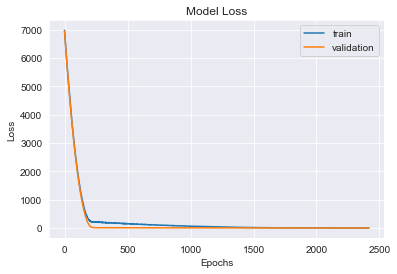

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

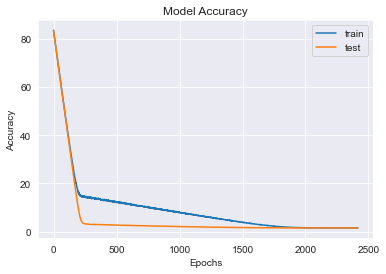

In [26]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [27]:
model.evaluate(X_test,y_test)

64/64 [==============================] - 0s 3ms/step - loss: 2.4052 - mean_absolute_error: 1.3424 - root_mean_squared_error: 1.5509


[2.4051733016967773, 1.342377781867981, 1.5508620738983154]

In [23]:
import time
import psutil

start = time.time()

In [24]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=36, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(loss='mean_squared_error', optimizer='adam',metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.RootMeanSquaredError()])
# Fitting to the training set
history = regressorGRU.fit(X_train, y_train, epochs=3000, batch_size=10, validation_data=(X_test, y_test))
#regressorGRU.summary()

Epoch 1/3000
808/808 [==============================] - 6s 4ms/step - loss: 2017.3421 - mean_absolute_error: 31.8579 - root_mean_squared_error: 41.3915 - val_loss: 9.6963 - val_mean_absolute_error: 2.8974 - val_root_mean_squared_error: 3.1139
Epoch 2/3000
808/808 [==============================] - 3s 3ms/step - loss: 196.9307 - mean_absolute_error: 11.2890 - root_mean_squared_error: 14.0267 - val_loss: 12.2266 - val_mean_absolute_error: 3.2907 - val_root_mean_squared_error: 3.4967
Epoch 3/3000
808/808 [==============================] - 3s 3ms/step - loss: 174.2715 - mean_absolute_error: 10.4182 - root_mean_squared_error: 13.1988 - val_loss: 4.4657 - val_mean_absolute_error: 1.8125 - val_root_mean_squared_error: 2.1132
Epoch 4/3000
808/808 [==============================] - 3s 3ms/step - loss: 177.2974 - mean_absolute_error: 10.5475 - root_mean_squared_error: 13.3145 - val_loss: 8.3808 - val_mean_absolute_error: 2.6510 - val_root_mean_squared_error: 2.8950
Epoch 5/3000
808/808 [========

Epoch 35/3000
808/808 [==============================] - 2s 3ms/step - loss: 131.7558 - mean_absolute_error: 9.0398 - root_mean_squared_error: 11.4763 - val_loss: 9.1388 - val_mean_absolute_error: 2.8330 - val_root_mean_squared_error: 3.0230
Epoch 36/3000
808/808 [==============================] - 2s 3ms/step - loss: 134.9607 - mean_absolute_error: 9.2165 - root_mean_squared_error: 11.6156 - val_loss: 4.1063 - val_mean_absolute_error: 1.7524 - val_root_mean_squared_error: 2.0264
Epoch 37/3000
808/808 [==============================] - 2s 3ms/step - loss: 134.9309 - mean_absolute_error: 9.2428 - root_mean_squared_error: 11.6146 - val_loss: 2.3734 - val_mean_absolute_error: 1.2909 - val_root_mean_squared_error: 1.5406
Epoch 38/3000
808/808 [==============================] - 2s 3ms/step - loss: 127.4740 - mean_absolute_error: 8.9761 - root_mean_squared_error: 11.2882 - val_loss: 3.7704 - val_mean_absolute_error: 1.6689 - val_root_mean_squared_error: 1.9418
Epoch 39/3000
808/808 [=========

Epoch 69/3000
808/808 [==============================] - 2s 2ms/step - loss: 90.5661 - mean_absolute_error: 7.4639 - root_mean_squared_error: 9.5140 - val_loss: 2.9060 - val_mean_absolute_error: 1.4576 - val_root_mean_squared_error: 1.7047
Epoch 70/3000
808/808 [==============================] - 2s 3ms/step - loss: 96.0951 - mean_absolute_error: 7.7804 - root_mean_squared_error: 9.7978 - val_loss: 6.2980 - val_mean_absolute_error: 2.3105 - val_root_mean_squared_error: 2.5096
Epoch 71/3000
808/808 [==============================] - 2s 3ms/step - loss: 94.6370 - mean_absolute_error: 7.6881 - root_mean_squared_error: 9.7259 - val_loss: 2.5677 - val_mean_absolute_error: 1.3579 - val_root_mean_squared_error: 1.6024
Epoch 72/3000
808/808 [==============================] - 2s 3ms/step - loss: 91.2929 - mean_absolute_error: 7.5964 - root_mean_squared_error: 9.5536 - val_loss: 8.4956 - val_mean_absolute_error: 2.7419 - val_root_mean_squared_error: 2.9147
Epoch 73/3000
808/808 [=================

808/808 [==============================] - 3s 4ms/step - loss: 62.5631 - mean_absolute_error: 6.3028 - root_mean_squared_error: 7.9093 - val_loss: 4.9430 - val_mean_absolute_error: 2.0601 - val_root_mean_squared_error: 2.2233
Epoch 104/3000
808/808 [==============================] - 3s 3ms/step - loss: 63.4988 - mean_absolute_error: 6.3119 - root_mean_squared_error: 7.9674 - val_loss: 2.5997 - val_mean_absolute_error: 1.4012 - val_root_mean_squared_error: 1.6123
Epoch 105/3000
808/808 [==============================] - 3s 4ms/step - loss: 62.5916 - mean_absolute_error: 6.2492 - root_mean_squared_error: 7.9101 - val_loss: 0.8411 - val_mean_absolute_error: 0.7876 - val_root_mean_squared_error: 0.9171
Epoch 106/3000
808/808 [==============================] - 3s 4ms/step - loss: 60.4663 - mean_absolute_error: 6.1861 - root_mean_squared_error: 7.7754 - val_loss: 3.1042 - val_mean_absolute_error: 1.5637 - val_root_mean_squared_error: 1.7619
Epoch 107/3000
808/808 [===========================

808/808 [==============================] - 2s 3ms/step - loss: 37.0715 - mean_absolute_error: 4.7790 - root_mean_squared_error: 6.0871 - val_loss: 1.0050 - val_mean_absolute_error: 0.8445 - val_root_mean_squared_error: 1.0025
Epoch 138/3000
808/808 [==============================] - 2s 3ms/step - loss: 38.5777 - mean_absolute_error: 4.8957 - root_mean_squared_error: 6.2101 - val_loss: 3.1291 - val_mean_absolute_error: 1.6339 - val_root_mean_squared_error: 1.7689
Epoch 139/3000
808/808 [==============================] - 2s 3ms/step - loss: 38.8966 - mean_absolute_error: 4.9178 - root_mean_squared_error: 6.2345 - val_loss: 1.3950 - val_mean_absolute_error: 1.0183 - val_root_mean_squared_error: 1.1811
Epoch 140/3000
808/808 [==============================] - 2s 3ms/step - loss: 37.0642 - mean_absolute_error: 4.7855 - root_mean_squared_error: 6.0846 - val_loss: 0.3754 - val_mean_absolute_error: 0.5302 - val_root_mean_squared_error: 0.6127
Epoch 141/3000
808/808 [===========================

808/808 [==============================] - 3s 4ms/step - loss: 19.6635 - mean_absolute_error: 3.5264 - root_mean_squared_error: 4.4311 - val_loss: 0.3601 - val_mean_absolute_error: 0.5027 - val_root_mean_squared_error: 0.6001
Epoch 172/3000
808/808 [==============================] - 3s 4ms/step - loss: 19.9237 - mean_absolute_error: 3.5285 - root_mean_squared_error: 4.4628 - val_loss: 0.2486 - val_mean_absolute_error: 0.3971 - val_root_mean_squared_error: 0.4986
Epoch 173/3000
808/808 [==============================] - 3s 4ms/step - loss: 19.1842 - mean_absolute_error: 3.4528 - root_mean_squared_error: 4.3795 - val_loss: 0.1922 - val_mean_absolute_error: 0.3720 - val_root_mean_squared_error: 0.4384
Epoch 174/3000
808/808 [==============================] - 3s 4ms/step - loss: 18.1304 - mean_absolute_error: 3.3793 - root_mean_squared_error: 4.2575 - val_loss: 0.1812 - val_mean_absolute_error: 0.3621 - val_root_mean_squared_error: 0.4257
Epoch 175/3000
808/808 [===========================

808/808 [==============================] - 2s 2ms/step - loss: 7.6050 - mean_absolute_error: 2.1945 - root_mean_squared_error: 2.7562 - val_loss: 0.2764 - val_mean_absolute_error: 0.4440 - val_root_mean_squared_error: 0.5257
Epoch 206/3000
808/808 [==============================] - 2s 3ms/step - loss: 7.0122 - mean_absolute_error: 2.0807 - root_mean_squared_error: 2.6476 - val_loss: 0.3524 - val_mean_absolute_error: 0.5117 - val_root_mean_squared_error: 0.5937
Epoch 207/3000
808/808 [==============================] - 3s 4ms/step - loss: 6.7281 - mean_absolute_error: 2.0410 - root_mean_squared_error: 2.5937 - val_loss: 0.8759 - val_mean_absolute_error: 0.8847 - val_root_mean_squared_error: 0.9359
Epoch 208/3000
808/808 [==============================] - 2s 3ms/step - loss: 6.7231 - mean_absolute_error: 2.0402 - root_mean_squared_error: 2.5919 - val_loss: 1.6332 - val_mean_absolute_error: 1.2369 - val_root_mean_squared_error: 1.2780
Epoch 209/3000
808/808 [==============================]

808/808 [==============================] - 3s 3ms/step - loss: 1.3642 - mean_absolute_error: 0.9151 - root_mean_squared_error: 1.1678 - val_loss: 0.3238 - val_mean_absolute_error: 0.5285 - val_root_mean_squared_error: 0.5690
Epoch 240/3000
808/808 [==============================] - 3s 3ms/step - loss: 1.3327 - mean_absolute_error: 0.9029 - root_mean_squared_error: 1.1541 - val_loss: 0.0929 - val_mean_absolute_error: 0.2608 - val_root_mean_squared_error: 0.3048
Epoch 241/3000
808/808 [==============================] - 3s 4ms/step - loss: 1.2135 - mean_absolute_error: 0.8567 - root_mean_squared_error: 1.1011 - val_loss: 0.0935 - val_mean_absolute_error: 0.2546 - val_root_mean_squared_error: 0.3057
Epoch 242/3000
808/808 [==============================] - 5s 6ms/step - loss: 1.1450 - mean_absolute_error: 0.8301 - root_mean_squared_error: 1.0698 - val_loss: 0.2259 - val_mean_absolute_error: 0.4383 - val_root_mean_squared_error: 0.4753
Epoch 243/3000
808/808 [==============================]

808/808 [==============================] - 3s 4ms/step - loss: 0.2832 - mean_absolute_error: 0.4005 - root_mean_squared_error: 0.5321 - val_loss: 0.0707 - val_mean_absolute_error: 0.2063 - val_root_mean_squared_error: 0.2658
Epoch 274/3000
808/808 [==============================] - 3s 4ms/step - loss: 0.2914 - mean_absolute_error: 0.4113 - root_mean_squared_error: 0.5395 - val_loss: 0.0822 - val_mean_absolute_error: 0.2313 - val_root_mean_squared_error: 0.2868
Epoch 275/3000
808/808 [==============================] - 4s 5ms/step - loss: 0.2855 - mean_absolute_error: 0.4107 - root_mean_squared_error: 0.5342 - val_loss: 0.0684 - val_mean_absolute_error: 0.2032 - val_root_mean_squared_error: 0.2615
Epoch 276/3000
808/808 [==============================] - 3s 4ms/step - loss: 0.2897 - mean_absolute_error: 0.4132 - root_mean_squared_error: 0.5381 - val_loss: 0.0794 - val_mean_absolute_error: 0.2290 - val_root_mean_squared_error: 0.2819
Epoch 277/3000
808/808 [==============================]

808/808 [==============================] - 3s 4ms/step - loss: 0.2762 - mean_absolute_error: 0.3938 - root_mean_squared_error: 0.5253 - val_loss: 0.0507 - val_mean_absolute_error: 0.1473 - val_root_mean_squared_error: 0.2252
Epoch 308/3000
808/808 [==============================] - 3s 4ms/step - loss: 0.2885 - mean_absolute_error: 0.4152 - root_mean_squared_error: 0.5370 - val_loss: 0.1659 - val_mean_absolute_error: 0.3784 - val_root_mean_squared_error: 0.4073
Epoch 309/3000
808/808 [==============================] - 3s 4ms/step - loss: 0.2713 - mean_absolute_error: 0.3957 - root_mean_squared_error: 0.5207 - val_loss: 0.0624 - val_mean_absolute_error: 0.1672 - val_root_mean_squared_error: 0.2498
Epoch 310/3000
808/808 [==============================] - 3s 4ms/step - loss: 0.2821 - mean_absolute_error: 0.4038 - root_mean_squared_error: 0.5309 - val_loss: 0.0772 - val_mean_absolute_error: 0.1988 - val_root_mean_squared_error: 0.2779
Epoch 311/3000
808/808 [==============================]

808/808 [==============================] - 3s 4ms/step - loss: 0.2710 - mean_absolute_error: 0.4007 - root_mean_squared_error: 0.5205 - val_loss: 0.1133 - val_mean_absolute_error: 0.2967 - val_root_mean_squared_error: 0.3366
Epoch 342/3000
808/808 [==============================] - 4s 4ms/step - loss: 0.2760 - mean_absolute_error: 0.3970 - root_mean_squared_error: 0.5252 - val_loss: 0.0916 - val_mean_absolute_error: 0.2599 - val_root_mean_squared_error: 0.3026
Epoch 343/3000
808/808 [==============================] - 3s 4ms/step - loss: 0.2848 - mean_absolute_error: 0.4080 - root_mean_squared_error: 0.5334 - val_loss: 0.0724 - val_mean_absolute_error: 0.1924 - val_root_mean_squared_error: 0.2690
Epoch 344/3000
808/808 [==============================] - 3s 4ms/step - loss: 0.2685 - mean_absolute_error: 0.3987 - root_mean_squared_error: 0.5181 - val_loss: 0.2234 - val_mean_absolute_error: 0.4520 - val_root_mean_squared_error: 0.4727
Epoch 345/3000
808/808 [==============================]

808/808 [==============================] - 3s 4ms/step - loss: 0.2888 - mean_absolute_error: 0.4078 - root_mean_squared_error: 0.5374 - val_loss: 0.0761 - val_mean_absolute_error: 0.2276 - val_root_mean_squared_error: 0.2759
Epoch 376/3000
808/808 [==============================] - 4s 4ms/step - loss: 0.2703 - mean_absolute_error: 0.3989 - root_mean_squared_error: 0.5197 - val_loss: 0.0904 - val_mean_absolute_error: 0.2608 - val_root_mean_squared_error: 0.3006
Epoch 377/3000
808/808 [==============================] - 3s 4ms/step - loss: 0.2958 - mean_absolute_error: 0.4082 - root_mean_squared_error: 0.5435 - val_loss: 0.1802 - val_mean_absolute_error: 0.4006 - val_root_mean_squared_error: 0.4246
Epoch 378/3000
808/808 [==============================] - 4s 4ms/step - loss: 0.2607 - mean_absolute_error: 0.3878 - root_mean_squared_error: 0.5106 - val_loss: 0.0513 - val_mean_absolute_error: 0.1374 - val_root_mean_squared_error: 0.2265
Epoch 379/3000
808/808 [==============================]

808/808 [==============================] - 4s 5ms/step - loss: 0.2573 - mean_absolute_error: 0.3840 - root_mean_squared_error: 0.5072 - val_loss: 0.0612 - val_mean_absolute_error: 0.1853 - val_root_mean_squared_error: 0.2474
Epoch 410/3000
808/808 [==============================] - 4s 4ms/step - loss: 0.2590 - mean_absolute_error: 0.3867 - root_mean_squared_error: 0.5088 - val_loss: 0.0573 - val_mean_absolute_error: 0.1573 - val_root_mean_squared_error: 0.2394
Epoch 411/3000
808/808 [==============================] - 4s 5ms/step - loss: 0.2711 - mean_absolute_error: 0.3979 - root_mean_squared_error: 0.5205 - val_loss: 0.0538 - val_mean_absolute_error: 0.1368 - val_root_mean_squared_error: 0.2318
Epoch 412/3000
808/808 [==============================] - 4s 4ms/step - loss: 0.2702 - mean_absolute_error: 0.3935 - root_mean_squared_error: 0.5196 - val_loss: 0.0503 - val_mean_absolute_error: 0.1477 - val_root_mean_squared_error: 0.2243
Epoch 413/3000
808/808 [==============================]

808/808 [==============================] - 2s 3ms/step - loss: 0.2706 - mean_absolute_error: 0.3947 - root_mean_squared_error: 0.5201 - val_loss: 0.0799 - val_mean_absolute_error: 0.2403 - val_root_mean_squared_error: 0.2828
Epoch 444/3000
808/808 [==============================] - 2s 2ms/step - loss: 0.2639 - mean_absolute_error: 0.3903 - root_mean_squared_error: 0.5137 - val_loss: 0.0769 - val_mean_absolute_error: 0.2119 - val_root_mean_squared_error: 0.2773
Epoch 445/3000
808/808 [==============================] - 2s 2ms/step - loss: 0.2626 - mean_absolute_error: 0.3901 - root_mean_squared_error: 0.5124 - val_loss: 0.1062 - val_mean_absolute_error: 0.2891 - val_root_mean_squared_error: 0.3259
Epoch 446/3000
808/808 [==============================] - 2s 2ms/step - loss: 0.2689 - mean_absolute_error: 0.4035 - root_mean_squared_error: 0.5185 - val_loss: 0.0651 - val_mean_absolute_error: 0.1980 - val_root_mean_squared_error: 0.2551
Epoch 447/3000
808/808 [==============================]

808/808 [==============================] - 2s 2ms/step - loss: 0.2641 - mean_absolute_error: 0.3913 - root_mean_squared_error: 0.5139 - val_loss: 0.0721 - val_mean_absolute_error: 0.2068 - val_root_mean_squared_error: 0.2685
Epoch 478/3000
808/808 [==============================] - 2s 2ms/step - loss: 0.2739 - mean_absolute_error: 0.4053 - root_mean_squared_error: 0.5233 - val_loss: 0.0766 - val_mean_absolute_error: 0.2348 - val_root_mean_squared_error: 0.2768
Epoch 479/3000
808/808 [==============================] - 2s 2ms/step - loss: 0.2531 - mean_absolute_error: 0.3822 - root_mean_squared_error: 0.5029 - val_loss: 0.0880 - val_mean_absolute_error: 0.2565 - val_root_mean_squared_error: 0.2966
Epoch 480/3000
808/808 [==============================] - 2s 2ms/step - loss: 0.2486 - mean_absolute_error: 0.3750 - root_mean_squared_error: 0.4984 - val_loss: 0.0585 - val_mean_absolute_error: 0.1771 - val_root_mean_squared_error: 0.2419
Epoch 481/3000
808/808 [==============================]

808/808 [==============================] - 1s 2ms/step - loss: 0.2640 - mean_absolute_error: 0.3888 - root_mean_squared_error: 0.5136 - val_loss: 0.0491 - val_mean_absolute_error: 0.1359 - val_root_mean_squared_error: 0.2215
Epoch 512/3000
808/808 [==============================] - 2s 2ms/step - loss: 0.2710 - mean_absolute_error: 0.4004 - root_mean_squared_error: 0.5203 - val_loss: 0.0531 - val_mean_absolute_error: 0.1550 - val_root_mean_squared_error: 0.2304
Epoch 513/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2576 - mean_absolute_error: 0.3850 - root_mean_squared_error: 0.5073 - val_loss: 0.0822 - val_mean_absolute_error: 0.2427 - val_root_mean_squared_error: 0.2866
Epoch 514/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2581 - mean_absolute_error: 0.3870 - root_mean_squared_error: 0.5078 - val_loss: 0.1011 - val_mean_absolute_error: 0.2851 - val_root_mean_squared_error: 0.3179
Epoch 515/3000
808/808 [==============================]

808/808 [==============================] - 2s 2ms/step - loss: 0.2632 - mean_absolute_error: 0.3898 - root_mean_squared_error: 0.5128 - val_loss: 0.0809 - val_mean_absolute_error: 0.2453 - val_root_mean_squared_error: 0.2845
Epoch 546/3000
808/808 [==============================] - 2s 2ms/step - loss: 0.2617 - mean_absolute_error: 0.3904 - root_mean_squared_error: 0.5112 - val_loss: 0.0981 - val_mean_absolute_error: 0.2802 - val_root_mean_squared_error: 0.3132
Epoch 547/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2698 - mean_absolute_error: 0.3979 - root_mean_squared_error: 0.5194 - val_loss: 0.0513 - val_mean_absolute_error: 0.1401 - val_root_mean_squared_error: 0.2264
Epoch 548/3000
808/808 [==============================] - 2s 2ms/step - loss: 0.2619 - mean_absolute_error: 0.3889 - root_mean_squared_error: 0.5116 - val_loss: 0.0473 - val_mean_absolute_error: 0.1341 - val_root_mean_squared_error: 0.2175
Epoch 549/3000
808/808 [==============================]

808/808 [==============================] - 1s 2ms/step - loss: 0.2744 - mean_absolute_error: 0.4020 - root_mean_squared_error: 0.5236 - val_loss: 0.0499 - val_mean_absolute_error: 0.1428 - val_root_mean_squared_error: 0.2234
Epoch 580/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2733 - mean_absolute_error: 0.3975 - root_mean_squared_error: 0.5227 - val_loss: 0.0463 - val_mean_absolute_error: 0.1236 - val_root_mean_squared_error: 0.2152
Epoch 581/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2650 - mean_absolute_error: 0.3909 - root_mean_squared_error: 0.5148 - val_loss: 0.0541 - val_mean_absolute_error: 0.1570 - val_root_mean_squared_error: 0.2325
Epoch 582/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2684 - mean_absolute_error: 0.3994 - root_mean_squared_error: 0.5179 - val_loss: 0.0961 - val_mean_absolute_error: 0.2769 - val_root_mean_squared_error: 0.3100
Epoch 583/3000
808/808 [==============================]

808/808 [==============================] - 2s 2ms/step - loss: 0.2533 - mean_absolute_error: 0.3820 - root_mean_squared_error: 0.5031 - val_loss: 0.0852 - val_mean_absolute_error: 0.2568 - val_root_mean_squared_error: 0.2919
Epoch 614/3000
808/808 [==============================] - 2s 2ms/step - loss: 0.2670 - mean_absolute_error: 0.3922 - root_mean_squared_error: 0.5164 - val_loss: 0.0477 - val_mean_absolute_error: 0.1395 - val_root_mean_squared_error: 0.2184
Epoch 615/3000
808/808 [==============================] - 2s 2ms/step - loss: 0.2566 - mean_absolute_error: 0.3811 - root_mean_squared_error: 0.5064 - val_loss: 0.1663 - val_mean_absolute_error: 0.3857 - val_root_mean_squared_error: 0.4077
Epoch 616/3000
808/808 [==============================] - 2s 2ms/step - loss: 0.2603 - mean_absolute_error: 0.3886 - root_mean_squared_error: 0.5101 - val_loss: 0.0721 - val_mean_absolute_error: 0.2187 - val_root_mean_squared_error: 0.2685
Epoch 617/3000
808/808 [==============================]

808/808 [==============================] - 2s 2ms/step - loss: 0.2459 - mean_absolute_error: 0.3794 - root_mean_squared_error: 0.4958 - val_loss: 0.1172 - val_mean_absolute_error: 0.3053 - val_root_mean_squared_error: 0.3424
Epoch 648/3000
808/808 [==============================] - 2s 3ms/step - loss: 0.2770 - mean_absolute_error: 0.3997 - root_mean_squared_error: 0.5261 - val_loss: 0.0545 - val_mean_absolute_error: 0.1648 - val_root_mean_squared_error: 0.2334
Epoch 649/3000
808/808 [==============================] - 2s 3ms/step - loss: 0.2686 - mean_absolute_error: 0.3935 - root_mean_squared_error: 0.5181 - val_loss: 0.1385 - val_mean_absolute_error: 0.3461 - val_root_mean_squared_error: 0.3722
Epoch 650/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2448 - mean_absolute_error: 0.3805 - root_mean_squared_error: 0.4947 - val_loss: 0.0722 - val_mean_absolute_error: 0.2252 - val_root_mean_squared_error: 0.2687
Epoch 651/3000
808/808 [==============================]

808/808 [==============================] - 2s 2ms/step - loss: 0.2595 - mean_absolute_error: 0.3881 - root_mean_squared_error: 0.5094 - val_loss: 0.0660 - val_mean_absolute_error: 0.2004 - val_root_mean_squared_error: 0.2568
Epoch 682/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2527 - mean_absolute_error: 0.3801 - root_mean_squared_error: 0.5026 - val_loss: 0.0454 - val_mean_absolute_error: 0.1341 - val_root_mean_squared_error: 0.2131
Epoch 683/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2635 - mean_absolute_error: 0.3910 - root_mean_squared_error: 0.5132 - val_loss: 0.0859 - val_mean_absolute_error: 0.2484 - val_root_mean_squared_error: 0.2931
Epoch 684/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2587 - mean_absolute_error: 0.3879 - root_mean_squared_error: 0.5085 - val_loss: 0.0451 - val_mean_absolute_error: 0.1304 - val_root_mean_squared_error: 0.2125
Epoch 685/3000
808/808 [==============================]

808/808 [==============================] - 1s 2ms/step - loss: 0.2754 - mean_absolute_error: 0.4001 - root_mean_squared_error: 0.5246 - val_loss: 0.0654 - val_mean_absolute_error: 0.2020 - val_root_mean_squared_error: 0.2558
Epoch 716/3000
808/808 [==============================] - 2s 2ms/step - loss: 0.2567 - mean_absolute_error: 0.3857 - root_mean_squared_error: 0.5065 - val_loss: 0.1320 - val_mean_absolute_error: 0.3377 - val_root_mean_squared_error: 0.3633
Epoch 717/3000
808/808 [==============================] - 2s 2ms/step - loss: 0.2743 - mean_absolute_error: 0.3912 - root_mean_squared_error: 0.5228 - val_loss: 0.0477 - val_mean_absolute_error: 0.1349 - val_root_mean_squared_error: 0.2184
Epoch 718/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2543 - mean_absolute_error: 0.3801 - root_mean_squared_error: 0.5041 - val_loss: 0.0553 - val_mean_absolute_error: 0.1693 - val_root_mean_squared_error: 0.2351
Epoch 719/3000
808/808 [==============================]

808/808 [==============================] - 1s 2ms/step - loss: 0.2690 - mean_absolute_error: 0.3936 - root_mean_squared_error: 0.5186 - val_loss: 0.1360 - val_mean_absolute_error: 0.3409 - val_root_mean_squared_error: 0.3688
Epoch 750/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2567 - mean_absolute_error: 0.3842 - root_mean_squared_error: 0.5066 - val_loss: 0.0521 - val_mean_absolute_error: 0.1562 - val_root_mean_squared_error: 0.2283
Epoch 751/3000
808/808 [==============================] - 2s 2ms/step - loss: 0.2636 - mean_absolute_error: 0.3884 - root_mean_squared_error: 0.5133 - val_loss: 0.0487 - val_mean_absolute_error: 0.1371 - val_root_mean_squared_error: 0.2207
Epoch 752/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2578 - mean_absolute_error: 0.3866 - root_mean_squared_error: 0.5076 - val_loss: 0.0775 - val_mean_absolute_error: 0.2326 - val_root_mean_squared_error: 0.2783
Epoch 753/3000
808/808 [==============================]

808/808 [==============================] - 1s 2ms/step - loss: 0.2557 - mean_absolute_error: 0.3870 - root_mean_squared_error: 0.5055 - val_loss: 0.0439 - val_mean_absolute_error: 0.1186 - val_root_mean_squared_error: 0.2095
Epoch 784/3000
808/808 [==============================] - 2s 2ms/step - loss: 0.2470 - mean_absolute_error: 0.3768 - root_mean_squared_error: 0.4968 - val_loss: 0.0973 - val_mean_absolute_error: 0.2807 - val_root_mean_squared_error: 0.3120
Epoch 785/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2611 - mean_absolute_error: 0.3841 - root_mean_squared_error: 0.5107 - val_loss: 0.0925 - val_mean_absolute_error: 0.2672 - val_root_mean_squared_error: 0.3041
Epoch 786/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2604 - mean_absolute_error: 0.3917 - root_mean_squared_error: 0.5102 - val_loss: 0.0957 - val_mean_absolute_error: 0.2712 - val_root_mean_squared_error: 0.3093
Epoch 787/3000
808/808 [==============================]

808/808 [==============================] - 2s 2ms/step - loss: 0.2558 - mean_absolute_error: 0.3778 - root_mean_squared_error: 0.5056 - val_loss: 0.0440 - val_mean_absolute_error: 0.1189 - val_root_mean_squared_error: 0.2098
Epoch 818/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2614 - mean_absolute_error: 0.3926 - root_mean_squared_error: 0.5111 - val_loss: 0.0704 - val_mean_absolute_error: 0.2149 - val_root_mean_squared_error: 0.2654
Epoch 819/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2499 - mean_absolute_error: 0.3774 - root_mean_squared_error: 0.4997 - val_loss: 0.0465 - val_mean_absolute_error: 0.1351 - val_root_mean_squared_error: 0.2155
Epoch 820/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2594 - mean_absolute_error: 0.3851 - root_mean_squared_error: 0.5091 - val_loss: 0.1199 - val_mean_absolute_error: 0.3181 - val_root_mean_squared_error: 0.3463
Epoch 821/3000
808/808 [==============================]

808/808 [==============================] - 2s 2ms/step - loss: 0.2678 - mean_absolute_error: 0.3892 - root_mean_squared_error: 0.5174 - val_loss: 0.0593 - val_mean_absolute_error: 0.1754 - val_root_mean_squared_error: 0.2435
Epoch 852/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2504 - mean_absolute_error: 0.3828 - root_mean_squared_error: 0.5003 - val_loss: 0.0931 - val_mean_absolute_error: 0.2703 - val_root_mean_squared_error: 0.3051
Epoch 853/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2537 - mean_absolute_error: 0.3793 - root_mean_squared_error: 0.5035 - val_loss: 0.2157 - val_mean_absolute_error: 0.4459 - val_root_mean_squared_error: 0.4645
Epoch 854/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2620 - mean_absolute_error: 0.3852 - root_mean_squared_error: 0.5116 - val_loss: 0.0530 - val_mean_absolute_error: 0.1404 - val_root_mean_squared_error: 0.2302
Epoch 855/3000
808/808 [==============================]

808/808 [==============================] - 1s 2ms/step - loss: 0.2560 - mean_absolute_error: 0.3855 - root_mean_squared_error: 0.5059 - val_loss: 0.0454 - val_mean_absolute_error: 0.1257 - val_root_mean_squared_error: 0.2131
Epoch 886/3000
808/808 [==============================] - 2s 2ms/step - loss: 0.2531 - mean_absolute_error: 0.3795 - root_mean_squared_error: 0.5030 - val_loss: 0.1815 - val_mean_absolute_error: 0.4020 - val_root_mean_squared_error: 0.4260
Epoch 887/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2613 - mean_absolute_error: 0.3868 - root_mean_squared_error: 0.5110 - val_loss: 0.0612 - val_mean_absolute_error: 0.1892 - val_root_mean_squared_error: 0.2474
Epoch 888/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2581 - mean_absolute_error: 0.3851 - root_mean_squared_error: 0.5080 - val_loss: 0.0540 - val_mean_absolute_error: 0.1576 - val_root_mean_squared_error: 0.2325
Epoch 889/3000
808/808 [==============================]

808/808 [==============================] - 1s 2ms/step - loss: 0.2486 - mean_absolute_error: 0.3736 - root_mean_squared_error: 0.4985 - val_loss: 0.0493 - val_mean_absolute_error: 0.1461 - val_root_mean_squared_error: 0.2221
Epoch 920/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2566 - mean_absolute_error: 0.3803 - root_mean_squared_error: 0.5063 - val_loss: 0.0444 - val_mean_absolute_error: 0.1230 - val_root_mean_squared_error: 0.2106
Epoch 921/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2533 - mean_absolute_error: 0.3869 - root_mean_squared_error: 0.5032 - val_loss: 0.0490 - val_mean_absolute_error: 0.1278 - val_root_mean_squared_error: 0.2215
Epoch 922/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2670 - mean_absolute_error: 0.3891 - root_mean_squared_error: 0.5167 - val_loss: 0.3091 - val_mean_absolute_error: 0.5366 - val_root_mean_squared_error: 0.5559
Epoch 923/3000
808/808 [==============================]

808/808 [==============================] - 1s 2ms/step - loss: 0.2472 - mean_absolute_error: 0.3767 - root_mean_squared_error: 0.4970 - val_loss: 0.0436 - val_mean_absolute_error: 0.1282 - val_root_mean_squared_error: 0.2089
Epoch 954/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2455 - mean_absolute_error: 0.3710 - root_mean_squared_error: 0.4952 - val_loss: 0.0705 - val_mean_absolute_error: 0.2119 - val_root_mean_squared_error: 0.2656
Epoch 955/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2510 - mean_absolute_error: 0.3800 - root_mean_squared_error: 0.5008 - val_loss: 0.0508 - val_mean_absolute_error: 0.1601 - val_root_mean_squared_error: 0.2253
Epoch 956/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2500 - mean_absolute_error: 0.3789 - root_mean_squared_error: 0.4998 - val_loss: 0.0598 - val_mean_absolute_error: 0.1771 - val_root_mean_squared_error: 0.2446
Epoch 957/3000
808/808 [==============================]

808/808 [==============================] - 2s 2ms/step - loss: 0.2498 - mean_absolute_error: 0.3830 - root_mean_squared_error: 0.4997 - val_loss: 0.0862 - val_mean_absolute_error: 0.2567 - val_root_mean_squared_error: 0.2935
Epoch 988/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2538 - mean_absolute_error: 0.3774 - root_mean_squared_error: 0.5036 - val_loss: 0.0504 - val_mean_absolute_error: 0.1465 - val_root_mean_squared_error: 0.2245
Epoch 989/3000
808/808 [==============================] - 2s 2ms/step - loss: 0.2711 - mean_absolute_error: 0.3925 - root_mean_squared_error: 0.5206 - val_loss: 0.0975 - val_mean_absolute_error: 0.2770 - val_root_mean_squared_error: 0.3122
Epoch 990/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2468 - mean_absolute_error: 0.3753 - root_mean_squared_error: 0.4965 - val_loss: 0.0604 - val_mean_absolute_error: 0.1869 - val_root_mean_squared_error: 0.2458
Epoch 991/3000
808/808 [==============================]

808/808 [==============================] - 1s 2ms/step - loss: 0.2563 - mean_absolute_error: 0.3842 - root_mean_squared_error: 0.5062 - val_loss: 0.1039 - val_mean_absolute_error: 0.2861 - val_root_mean_squared_error: 0.3223
Epoch 1022/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2539 - mean_absolute_error: 0.3790 - root_mean_squared_error: 0.5038 - val_loss: 0.0870 - val_mean_absolute_error: 0.2603 - val_root_mean_squared_error: 0.2950
Epoch 1023/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2735 - mean_absolute_error: 0.3933 - root_mean_squared_error: 0.5228 - val_loss: 0.1181 - val_mean_absolute_error: 0.3145 - val_root_mean_squared_error: 0.3436
Epoch 1024/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2655 - mean_absolute_error: 0.3880 - root_mean_squared_error: 0.5151 - val_loss: 0.0548 - val_mean_absolute_error: 0.1641 - val_root_mean_squared_error: 0.2340
Epoch 1025/3000
808/808 [===========================

808/808 [==============================] - 1s 2ms/step - loss: 0.2626 - mean_absolute_error: 0.3833 - root_mean_squared_error: 0.5124 - val_loss: 0.0597 - val_mean_absolute_error: 0.1825 - val_root_mean_squared_error: 0.2444
Epoch 1056/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2853 - mean_absolute_error: 0.4097 - root_mean_squared_error: 0.5333 - val_loss: 0.0514 - val_mean_absolute_error: 0.1558 - val_root_mean_squared_error: 0.2266
Epoch 1057/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2573 - mean_absolute_error: 0.3819 - root_mean_squared_error: 0.5070 - val_loss: 0.0593 - val_mean_absolute_error: 0.1818 - val_root_mean_squared_error: 0.2435
Epoch 1058/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2656 - mean_absolute_error: 0.3865 - root_mean_squared_error: 0.5152 - val_loss: 0.1187 - val_mean_absolute_error: 0.3180 - val_root_mean_squared_error: 0.3445
Epoch 1059/3000
808/808 [===========================

808/808 [==============================] - 2s 2ms/step - loss: 0.2494 - mean_absolute_error: 0.3746 - root_mean_squared_error: 0.4992 - val_loss: 0.0469 - val_mean_absolute_error: 0.1388 - val_root_mean_squared_error: 0.2165
Epoch 1090/3000
808/808 [==============================] - 2s 2ms/step - loss: 0.2587 - mean_absolute_error: 0.3868 - root_mean_squared_error: 0.5085 - val_loss: 0.0485 - val_mean_absolute_error: 0.1349 - val_root_mean_squared_error: 0.2202
Epoch 1091/3000
808/808 [==============================] - 2s 2ms/step - loss: 0.2673 - mean_absolute_error: 0.3892 - root_mean_squared_error: 0.5169 - val_loss: 0.0452 - val_mean_absolute_error: 0.1227 - val_root_mean_squared_error: 0.2125
Epoch 1092/3000
808/808 [==============================] - 2s 3ms/step - loss: 0.2479 - mean_absolute_error: 0.3759 - root_mean_squared_error: 0.4978 - val_loss: 0.0461 - val_mean_absolute_error: 0.1263 - val_root_mean_squared_error: 0.2147
Epoch 1093/3000
808/808 [===========================

808/808 [==============================] - 1s 2ms/step - loss: 0.2439 - mean_absolute_error: 0.3737 - root_mean_squared_error: 0.4936 - val_loss: 0.0808 - val_mean_absolute_error: 0.2163 - val_root_mean_squared_error: 0.2843
Epoch 1124/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2609 - mean_absolute_error: 0.3862 - root_mean_squared_error: 0.5107 - val_loss: 0.0796 - val_mean_absolute_error: 0.2433 - val_root_mean_squared_error: 0.2821
Epoch 1125/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2498 - mean_absolute_error: 0.3741 - root_mean_squared_error: 0.4995 - val_loss: 0.1823 - val_mean_absolute_error: 0.4068 - val_root_mean_squared_error: 0.4269
Epoch 1126/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2539 - mean_absolute_error: 0.3800 - root_mean_squared_error: 0.5038 - val_loss: 0.0523 - val_mean_absolute_error: 0.1604 - val_root_mean_squared_error: 0.2288
Epoch 1127/3000
808/808 [===========================

808/808 [==============================] - 1s 1ms/step - loss: 0.2623 - mean_absolute_error: 0.3852 - root_mean_squared_error: 0.5121 - val_loss: 0.0558 - val_mean_absolute_error: 0.1710 - val_root_mean_squared_error: 0.2363
Epoch 1158/3000
808/808 [==============================] - 1s 1ms/step - loss: 0.2645 - mean_absolute_error: 0.3889 - root_mean_squared_error: 0.5142 - val_loss: 0.0671 - val_mean_absolute_error: 0.2084 - val_root_mean_squared_error: 0.2591
Epoch 1159/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2584 - mean_absolute_error: 0.3853 - root_mean_squared_error: 0.5082 - val_loss: 0.0800 - val_mean_absolute_error: 0.2423 - val_root_mean_squared_error: 0.2829
Epoch 1160/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2728 - mean_absolute_error: 0.3925 - root_mean_squared_error: 0.5221 - val_loss: 0.0528 - val_mean_absolute_error: 0.1626 - val_root_mean_squared_error: 0.2298
Epoch 1161/3000
808/808 [===========================

808/808 [==============================] - 1s 2ms/step - loss: 0.2680 - mean_absolute_error: 0.3944 - root_mean_squared_error: 0.5175 - val_loss: 0.0727 - val_mean_absolute_error: 0.2206 - val_root_mean_squared_error: 0.2696
Epoch 1192/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2401 - mean_absolute_error: 0.3743 - root_mean_squared_error: 0.4899 - val_loss: 0.0450 - val_mean_absolute_error: 0.1307 - val_root_mean_squared_error: 0.2122
Epoch 1193/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2609 - mean_absolute_error: 0.3851 - root_mean_squared_error: 0.5107 - val_loss: 0.0477 - val_mean_absolute_error: 0.1329 - val_root_mean_squared_error: 0.2183
Epoch 1194/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2503 - mean_absolute_error: 0.3764 - root_mean_squared_error: 0.5002 - val_loss: 0.0909 - val_mean_absolute_error: 0.2669 - val_root_mean_squared_error: 0.3015
Epoch 1195/3000
808/808 [===========================

808/808 [==============================] - 1s 2ms/step - loss: 0.2534 - mean_absolute_error: 0.3811 - root_mean_squared_error: 0.5032 - val_loss: 0.0526 - val_mean_absolute_error: 0.1677 - val_root_mean_squared_error: 0.2293
Epoch 1226/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2643 - mean_absolute_error: 0.3848 - root_mean_squared_error: 0.5139 - val_loss: 0.0477 - val_mean_absolute_error: 0.1451 - val_root_mean_squared_error: 0.2183
Epoch 1227/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2697 - mean_absolute_error: 0.3891 - root_mean_squared_error: 0.5192 - val_loss: 0.0486 - val_mean_absolute_error: 0.1416 - val_root_mean_squared_error: 0.2204
Epoch 1228/3000
808/808 [==============================] - 1s 1ms/step - loss: 0.2417 - mean_absolute_error: 0.3689 - root_mean_squared_error: 0.4915 - val_loss: 0.0515 - val_mean_absolute_error: 0.1521 - val_root_mean_squared_error: 0.2269
Epoch 1229/3000
808/808 [===========================

808/808 [==============================] - 1s 2ms/step - loss: 0.2606 - mean_absolute_error: 0.3817 - root_mean_squared_error: 0.5103 - val_loss: 0.0536 - val_mean_absolute_error: 0.1644 - val_root_mean_squared_error: 0.2316
Epoch 1260/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2811 - mean_absolute_error: 0.4001 - root_mean_squared_error: 0.5301 - val_loss: 0.0552 - val_mean_absolute_error: 0.1665 - val_root_mean_squared_error: 0.2348
Epoch 1261/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2436 - mean_absolute_error: 0.3720 - root_mean_squared_error: 0.4933 - val_loss: 0.0489 - val_mean_absolute_error: 0.1363 - val_root_mean_squared_error: 0.2212
Epoch 1262/3000
808/808 [==============================] - 1s 2ms/step - loss: 0.2516 - mean_absolute_error: 0.3791 - root_mean_squared_error: 0.5015 - val_loss: 0.0458 - val_mean_absolute_error: 0.1208 - val_root_mean_squared_error: 0.2141
Epoch 1263/3000
738/808 [==========================>

KeyboardInterrupt: 

In [31]:
end = time.time()
print("Time taken:", end- start)

Time taken: 1664.8966209888458


In [32]:
print(psutil.Process().memory_info().peak_wset)

577036288


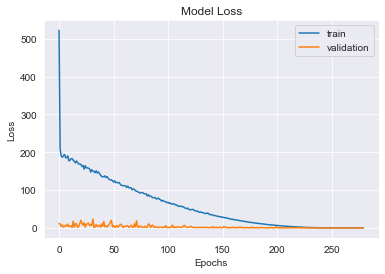

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

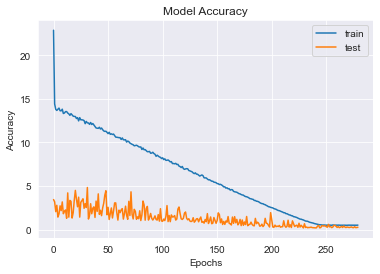

In [34]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [19]:
model.evaluate(X_test,y_test)

72/72 [==============================] - 0s 873us/step - loss: 1.7630e-04 - mean_absolute_error: 0.0099 - root_mean_squared_error: 0.0133


[0.00017630266665946692, 0.009870669804513454, 0.013277901336550713]